In [1]:
# Ensure that the model you have stored locally is the one trained on the same
# source data as the test data set comes from.

In [2]:
#  Importing packages
import os
import sys
from datetime import datetime

base_path = f"/opt/ml/processing/input/code"
sys.path.append("..")
sys.path.append(base_path)
sys.path.append(os.path.join(base_path, "src"))
sys.path.append("/root/src/")

#   Importing custom functions
from src.utilities.config_helper import Configuration
from src.tlv_evaluator import BaseTLVEvaluator

from src.vc_utils.src.snowflake.connection_maker import SnowflakeConnectionMaker
from src.helper import extract_trained_model
from src.vc_utils.src.snowflake.database_connector import DatabaseConnector

INFO:matplotlib.font_manager:generated new fontManager


In [3]:
print(f"This notebook was last run on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.")

This notebook was last run on 2025-06-12 12:06:16.


In [4]:
lottery = os.environ.get("LOTTERY")

In [5]:
config = Configuration.load_sagemaker(lottery, job_type="processing")

In [6]:
model_path = os.path.join(base_path, "models")
model_name = f"model.tar.gz"
extract_dir = os.path.join(base_path, "models/extracted")

model = extract_trained_model(
    model_path=model_path, model_name=model_name, extract_dir=extract_dir
)

In [7]:
with SnowflakeConnectionMaker() as connection_maker:
    connection = connection_maker.get_connection()

    lottery = os.environ.get("LOTTERY")
    connector = DatabaseConnector(connection)
    config = Configuration.load_sagemaker(lottery, job_type="processing")
    evaluator = BaseTLVEvaluator(
        lottery=lottery,
        config=config,
        connector=connector,
        tlv_model=model,
    )

    evaluator.run_evaluation_metrics()

INFO:root:Fixing lottery name: VL


INFO:root:Deploying in environment: AT1


INFO:root:Initializing connection for snowflake


INFO:snowflake.connector.connection:Snowflake Connector for Python Version: 3.15.0, Python Version: 3.11.13, Platform: Linux-5.10.236-228.935.amzn2.x86_64-x86_64-with-glibc2.36


INFO:snowflake.connector.connection:Connecting to GLOBAL Snowflake domain


INFO:root:Managing Snowflake connection in context manager, connection will be closed upon exiting the context manager


COX PH MODEL SUMMARY:


<lifelines.CoxTimeVaryingFitter: fitted with 2802937 periods, 2802937 subjects, 115263 events>
         event col = 'churn_current_month'
         penalizer = 0.0001
            strata = ['st_stratify_age_band_75_84', 'st_stratify_age_band_85_plus']
number of subjects = 2802937
 number of periods = 2802937
  number of events = 115263
partial log-likelihood = -1176815.87
  time fit was run = 2025-06-12 07:59:56 UTC

---
                                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                                  
pca0                                                 0.02       1.02       0.00             0.01             0.03                 1.01                 1.03
pca1                                                -0.03       0.97       0.00            -0.04            -0.02                 0.96                 0.98
pca2                                                -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
pca3                                                 0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
pca4                                                -0.05       0.95       0.00            -0.06            -0.05                 0.94                 0.95
pca5                                                 0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
pca6                                                -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
pca7                                                 0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01
pca8                                                -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
pca9                                                -0.01       0.99       0.00            -0.01            -0.01                 0.99                 0.99
pca10                                               -0.02       0.98       0.00            -0.03            -0.02                 0.97                 0.98
pca11                                                0.01       1.01       0.00             0.00             0.01                 1.00                 1.01
pca12                                               -0.00       1.00       0.00            -0.01            -0.00                 0.99                 1.00
pca13                                               -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
pca14                                               -0.03       0.97       0.00            -0.03            -0.02                 0.97                 0.98
pca15                                               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
pca16                                                0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
pca17                                               -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
pca18                                                0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
pca19                                               -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
pca20                                                0.01       1.01       0.00             0.00             0.01                 1.00           

INFO:root:Untransformed data has columns: Index(['lottery', 'customer_id', 'ticket_id', 'start_draw_year_month',
       'end_draw_year_month', 'draw_period_number', 'extra_draw_period',
       'st_age_band', 'st_stratify_age_band_85_plus',
       'st_stratify_age_band_75_84',
       ...
       'channel_id_telemarketing|telemarketing|cross sell_attribution',
       'channel_id_telemarketing|telemarketing|existing_attribution',
       'channel_id_telemarketing|telemarketing|lapsed_attribution',
       'channel_id_telemarketing|telemarketing|partially addressed_attribution',
       'channel_id_telemarketing|telemarketing|other_attribution',
       'other_channel_attribution', 'start_time', 'end_time',
       'insert_datetime', 'index_col'],
      dtype='object', length=138)


INFO:root:Setting column names to lower case


INFO:root:Getting column dtypes from configs


INFO:root:Getting feature dict per attribute for feature_key = column_datatype


INFO:root:Setting column datatypes as: {'st_age_band': 'category', 'st_gender': 'category', 'st_region': 'category', 'st_initial_payment_method': 'category', 'st_created_month': 'category', 'st_longest_lifetime_discrete': 'category', 'st_acquisition_type': 'category', 'dy_active_tickets': 'category', 'dy_cancelled_tickets': 'category', 'dy_cancellation_l3m': 'category', 'dy_cancellation_l12m_to_l3m': 'category', 'dy_upsell_l3m': 'category', 'dy_upsell_l12m_to_l3m': 'category', 'dy_cross_sell_l3m': 'category', 'dy_cross_sell_l12m_to_l3m': 'category', 'dy_value_highest_won_non_monetary_prize_category': 'category', 'dy_monetary_prize_won_l3m': 'category', 'dy_monetary_prize_won_l12m_to_l3m': 'category', 'dy_non_monetary_prize_won_l3m': 'category', 'dy_non_monetary_prize_won_l12m_to_l3m': 'category', 'dy_add_on': 'category', 'dy_free_playing_round_l3m': 'category', 'dy_free_playing_round_l12m_to_l3m': 'category', 'dy_failed_payment_l3m': 'category', 'dy_failed_payment_l12m_to_l3m': 'catego

INFO:root:Columns included in pre processing: ['st_age_band', 'st_gender', 'st_region', 'st_initial_payment_method', 'st_created_month', 'st_longest_lifetime_discrete', 'st_acquisition_type', 'channel_id_door to door|door to door|_attribution', 'channel_id_e-mail|internal e-mail|cold_attribution', 'channel_id_e-mail|internal e-mail|cross sell_attribution', 'channel_id_e-mail|internal e-mail|existing_attribution', 'channel_id_e-mail|internal e-mail|lapsed_attribution', 'channel_id_e-mail|internal e-mail|partially addressed_attribution', 'channel_id_e-mail|internal e-mail|other_attribution', 'channel_id_fieldmarketing|congress|_attribution', 'channel_id_fieldmarketing|event|_attribution', 'channel_id_fieldmarketing|musea|_attribution', 'channel_id_fieldmarketing|street|_attribution', 'channel_id_fieldmarketing|themepark|_attribution', 'channel_id_fieldmarketing|zoo|_attribution', 'channel_id_media|linear tv|_attribution', 'channel_id_online|affiliate|_attribution', 'channel_id_online|dis

INFO:root:Shape before transform: (1002942, 68)


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


INFO:root:Shape after transform: (1002942, 133)


INFO:root:Transformed data has columns: Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9',
       ...
       'dy_failed_payment_l3m_2-4', 'dy_failed_payment_l3m_5+',
       'dy_failed_payment_l12m_to_l3m_1', 'dy_failed_payment_l12m_to_l3m_2-4',
       'dy_failed_payment_l12m_to_l3m_5+', 'extra_draw_period',
       'st_stratify_age_band_75_84', 'st_stratify_age_band_85_plus',
       'start_time', 'end_time'],
      dtype='object', length=131)


INFO:root:Baseline hazard:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
195         0.006219
196         0.005089
197         0.003680
198         0.006244
199         0.005304

[200 rows x 1 columns]


INFO:root:Calculating partial hazard rates


INFO:root:Partial hazards:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating extrapolated baseline hazard


INFO:root:Extrapolating baseline hazard for times: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433


INFO:root:Truncating extrapolated hazard to h(t) >= 0.005


INFO:root:Baseline hazard after extrapolation:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
495         0.005000
496         0.005000
497         0.005000
498         0.005000
499         0.005000

[500 rows x 1 columns]


INFO:root:Calculating hazard rates


INFO:root:Hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.018475                          0.004800   
2                            0.018015                          0.004800   
3                            0.014567                          0.004800   
4                            0.014421                          0.003239   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating cumulative hazard rates


INFO:root:Cumulative hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.036713                          0.009591   
2                            0.054729                          0.014391   
3                            0.069296                          0.019191   
4                            0.083716                          0.022430   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating survival curves


INFO:root:Final hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.981927                          0.995221   
1                            0.963952                          0.990455   
2                            0.946742                          0.985712   
3                            0.933051                          0.980992   
4                            0.919692                          0.977819   
..                                ...                               ...   
495                          0.000000                          0.000000   
496                          0.000000                          0.000000   
497                          0.000000                          0.000000   
498                          0.000000                          0.000000   
499                          0.000000                          0.000000   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating conditional survival curves


Predicted survival curves    c219eea4fb985264b45f266432c00df4  964bd7d4f70287da641732ac2fa14b1d  \
0                          1.000000                          1.000000   
1                          0.994024                          0.993101   
2                          0.988083                          0.985811   
3                          0.982922                          0.979673   
4                          0.977419                          0.974787   

   7980b2148a0b4f8efcc3a597b49847b7  bc726518bc17ae410f5d1149f057426e  \
0                          1.000000                          1.000000   
1                          0.968659                          0.996228   
2                          0.942022                          0.992470   
3                          0.917873                          0.988726   
4                          0.895165                          0.984997   

   290135f90d17d360f0dc6e98de683029  a6487d170fba81e32e125842196a5369  \
0                      

survival‐prob vector at time 12:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 12, dtype: float64


survival‐prob vector at time 24:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 24, dtype: float64


survival‐prob vector at time 30:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 30, dtype: float64


INFO:root:Baseline hazard:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
195         0.006219
196         0.005089
197         0.003680
198         0.006244
199         0.005304

[200 rows x 1 columns]


INFO:root:Calculating partial hazard rates


Calculating partial hazards for 30000 instances for C-index.


INFO:root:Partial hazards:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating extrapolated baseline hazard


INFO:root:Extrapolating baseline hazard for times: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433


INFO:root:Truncating extrapolated hazard to h(t) >= 0.005


INFO:root:Baseline hazard after extrapolation:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
495         0.005000
496         0.005000
497         0.005000
498         0.005000
499         0.005000

[500 rows x 1 columns]


INFO:root:Calculating hazard rates


INFO:root:Hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.018475                          0.004800   
2                            0.018015                          0.004800   
3                            0.014567                          0.004800   
4                            0.014421                          0.003239   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating cumulative hazard rates


INFO:root:Cumulative hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.036713                          0.009591   
2                            0.054729                          0.014391   
3                            0.069296                          0.019191   
4                            0.083716                          0.022430   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating survival curves


INFO:root:Final hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.981927                          0.995221   
1                            0.963952                          0.990455   
2                            0.946742                          0.985712   
3                            0.933051                          0.980992   
4                            0.919692                          0.977819   
..                                ...                               ...   
495                          0.000000                          0.000000   
496                          0.000000                          0.000000   
497                          0.000000                          0.000000   
498                          0.000000                          0.000000   
499                          0.000000                          0.000000   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating conditional survival curves


INFO:root:Calculating TLV for 36 periods


INFO:root:Calculating TLR for 36 periods


INFO:root:Calculating expected lifetime for 36 periods


INFO:root:Closing connection to Snowflake using __exit__ method in the SnowflakeConnectionMaker class


INFO:root:Connection to Snowflake successfully closed.


Calculated Concordance Index on provided data (on a sample of 29565): 0.7304
Evaluation results:
Brier scores on these evaluation time points:
[6, 12, 24, 30]
{6.0: nan, 12.0: nan, 24.0: nan, 30.0: nan}
Concordance index: 0.7303707651087291


INFO:root:Fixing lottery name: VL


INFO:root:Deploying in environment: AT1


INFO:root:Initializing connection for snowflake


INFO:snowflake.connector.connection:Snowflake Connector for Python Version: 3.15.0, Python Version: 3.11.13, Platform: Linux-5.10.236-228.935.amzn2.x86_64-x86_64-with-glibc2.36


INFO:snowflake.connector.connection:Connecting to GLOBAL Snowflake domain


INFO:root:Managing Snowflake connection in context manager, connection will be closed upon exiting the context manager


INFO:root:Untransformed data has columns: Index(['lottery', 'customer_id', 'ticket_id', 'start_draw_year_month',
       'end_draw_year_month', 'draw_period_number', 'extra_draw_period',
       'st_age_band', 'st_stratify_age_band_85_plus',
       'st_stratify_age_band_75_84',
       ...
       'channel_id_telemarketing|telemarketing|cross sell_attribution',
       'channel_id_telemarketing|telemarketing|existing_attribution',
       'channel_id_telemarketing|telemarketing|lapsed_attribution',
       'channel_id_telemarketing|telemarketing|partially addressed_attribution',
       'channel_id_telemarketing|telemarketing|other_attribution',
       'other_channel_attribution', 'start_time', 'end_time',
       'insert_datetime', 'index_col'],
      dtype='object', length=138)


INFO:root:Setting column names to lower case


INFO:root:Getting column dtypes from configs


INFO:root:Getting feature dict per attribute for feature_key = column_datatype


INFO:root:Setting column datatypes as: {'st_age_band': 'category', 'st_gender': 'category', 'st_region': 'category', 'st_initial_payment_method': 'category', 'st_created_month': 'category', 'st_longest_lifetime_discrete': 'category', 'st_acquisition_type': 'category', 'dy_active_tickets': 'category', 'dy_cancelled_tickets': 'category', 'dy_cancellation_l3m': 'category', 'dy_cancellation_l12m_to_l3m': 'category', 'dy_upsell_l3m': 'category', 'dy_upsell_l12m_to_l3m': 'category', 'dy_cross_sell_l3m': 'category', 'dy_cross_sell_l12m_to_l3m': 'category', 'dy_value_highest_won_non_monetary_prize_category': 'category', 'dy_monetary_prize_won_l3m': 'category', 'dy_monetary_prize_won_l12m_to_l3m': 'category', 'dy_non_monetary_prize_won_l3m': 'category', 'dy_non_monetary_prize_won_l12m_to_l3m': 'category', 'dy_add_on': 'category', 'dy_free_playing_round_l3m': 'category', 'dy_free_playing_round_l12m_to_l3m': 'category', 'dy_failed_payment_l3m': 'category', 'dy_failed_payment_l12m_to_l3m': 'catego

INFO:root:Columns included in pre processing: ['st_age_band', 'st_gender', 'st_region', 'st_initial_payment_method', 'st_created_month', 'st_longest_lifetime_discrete', 'st_acquisition_type', 'channel_id_door to door|door to door|_attribution', 'channel_id_e-mail|internal e-mail|cold_attribution', 'channel_id_e-mail|internal e-mail|cross sell_attribution', 'channel_id_e-mail|internal e-mail|existing_attribution', 'channel_id_e-mail|internal e-mail|lapsed_attribution', 'channel_id_e-mail|internal e-mail|partially addressed_attribution', 'channel_id_e-mail|internal e-mail|other_attribution', 'channel_id_fieldmarketing|congress|_attribution', 'channel_id_fieldmarketing|event|_attribution', 'channel_id_fieldmarketing|musea|_attribution', 'channel_id_fieldmarketing|street|_attribution', 'channel_id_fieldmarketing|themepark|_attribution', 'channel_id_fieldmarketing|zoo|_attribution', 'channel_id_media|linear tv|_attribution', 'channel_id_online|affiliate|_attribution', 'channel_id_online|dis

INFO:root:Shape before transform: (1002942, 68)


/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


INFO:root:Shape after transform: (1002942, 133)


INFO:root:Transformed data has columns: Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9',
       ...
       'dy_failed_payment_l3m_2-4', 'dy_failed_payment_l3m_5+',
       'dy_failed_payment_l12m_to_l3m_1', 'dy_failed_payment_l12m_to_l3m_2-4',
       'dy_failed_payment_l12m_to_l3m_5+', 'extra_draw_period',
       'st_stratify_age_band_75_84', 'st_stratify_age_band_85_plus',
       'start_time', 'end_time'],
      dtype='object', length=131)


INFO:root:Baseline hazard:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
195         0.006219
196         0.005089
197         0.003680
198         0.006244
199         0.005304

[200 rows x 1 columns]


INFO:root:Calculating partial hazard rates


INFO:root:Partial hazards:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating extrapolated baseline hazard


INFO:root:Extrapolating baseline hazard for times: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433


INFO:root:Truncating extrapolated hazard to h(t) >= 0.005


INFO:root:Baseline hazard after extrapolation:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
495         0.005000
496         0.005000
497         0.005000
498         0.005000
499         0.005000

[500 rows x 1 columns]


INFO:root:Calculating hazard rates


INFO:root:Hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.018475                          0.004800   
2                            0.018015                          0.004800   
3                            0.014567                          0.004800   
4                            0.014421                          0.003239   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating cumulative hazard rates


INFO:root:Cumulative hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.018238                          0.004791   
1                            0.036713                          0.009591   
2                            0.054729                          0.014391   
3                            0.069296                          0.019191   
4                            0.083716                          0.022430   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating survival curves


INFO:root:Final hazard rates:


INFO:root:     00036e8ff25fb73f1544251a74a968f9  00066927f3eaa51c42f90228721ab0aa  \
0                            0.981927                          0.995221   
1                            0.963952                          0.990455   
2                            0.946742                          0.985712   
3                            0.933051                          0.980992   
4                            0.919692                          0.977819   
..                                ...                               ...   
495                          0.000000                          0.000000   
496                          0.000000                          0.000000   
497                          0.000000                          0.000000   
498                          0.000000                          0.000000   
499                          0.000000                          0.000000   

     0006a831ff7b1d57c9fbc52df23f66e0  0006b2d2c1079061b0e4aabf51df0f87  \
0             

INFO:root:Calculating conditional survival curves


INFO:root:Calculating TLV for 36 periods


INFO:root:Calculating TLR for 36 periods


INFO:root:Calculating expected lifetime for 36 periods


INFO:root:Calculating TLV for 36 periods


INFO:root:Calculating TLR for 36 periods


INFO:root:Calculating expected lifetime for 36 periods


AGGREGATE OUTPUT:
                                     subset aggregate_type  period  \
0                         st_age_band_25-34       lifetime      36   
1                         st_age_band_35-44       lifetime      36   
2                         st_age_band_45-54       lifetime      36   
3                         st_age_band_55-64       lifetime      36   
4                         st_age_band_65-74       lifetime      36   
5                               st_gender_M       lifetime      36   
6                               st_gender_U       lifetime      36   
7                       st_region_Flevoland       lifetime      36   
8                       st_region_Friesland       lifetime      36   
9                      st_region_Gelderland       lifetime      36   
10                      st_region_Groningen       lifetime      36   
11                        st_region_Limburg       lifetime      36   
12                  st_region_Noord brabant       lifetime      36   
13

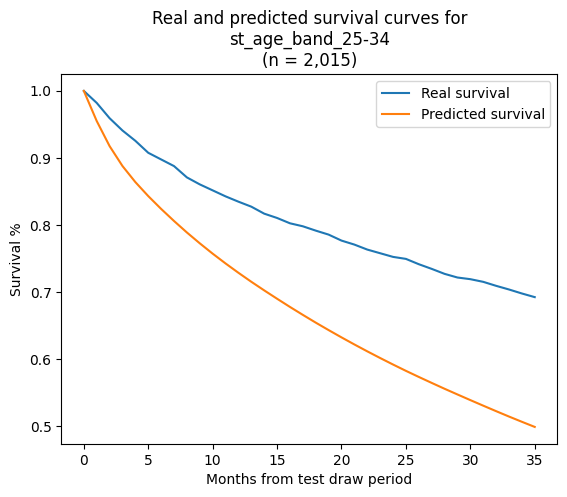

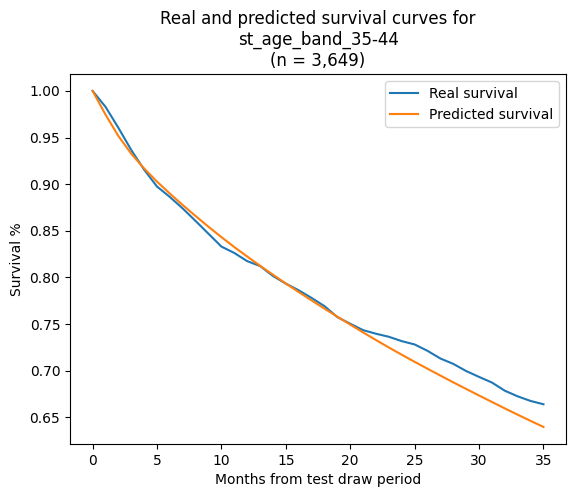

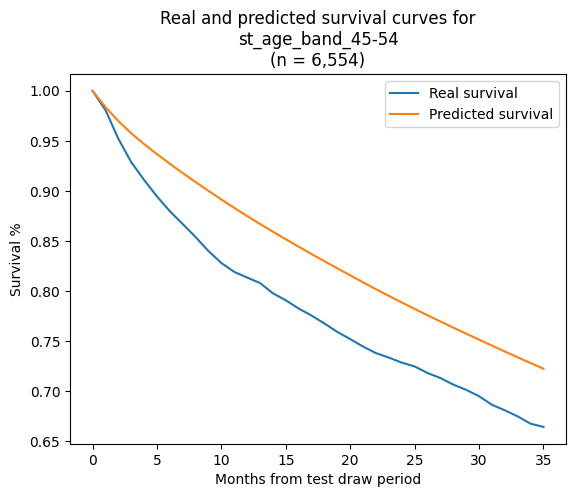

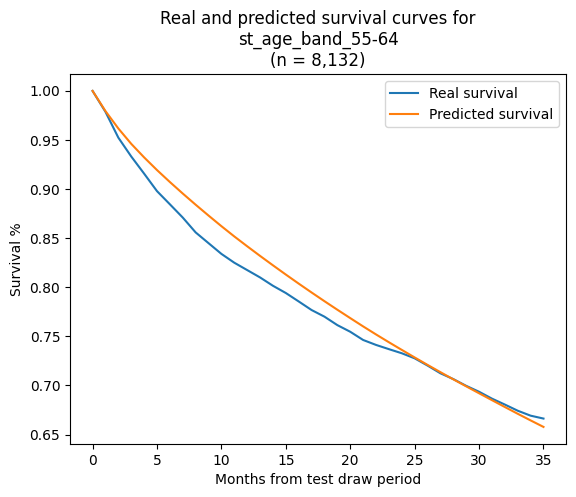

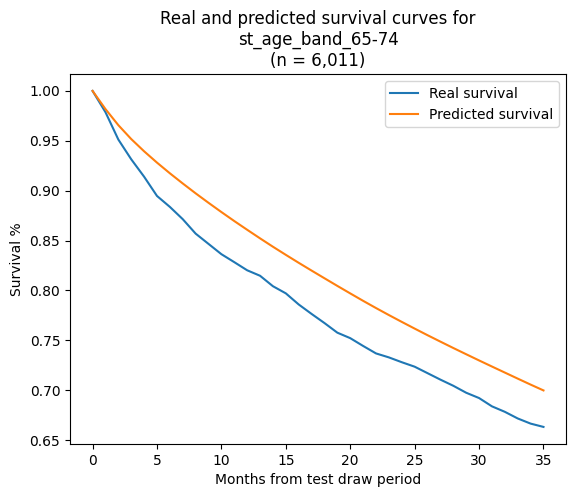

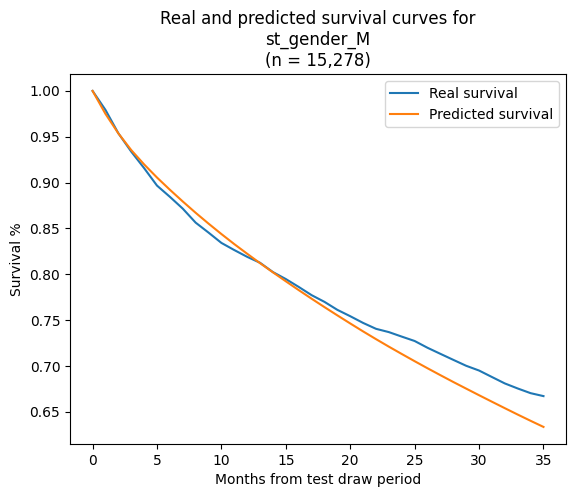

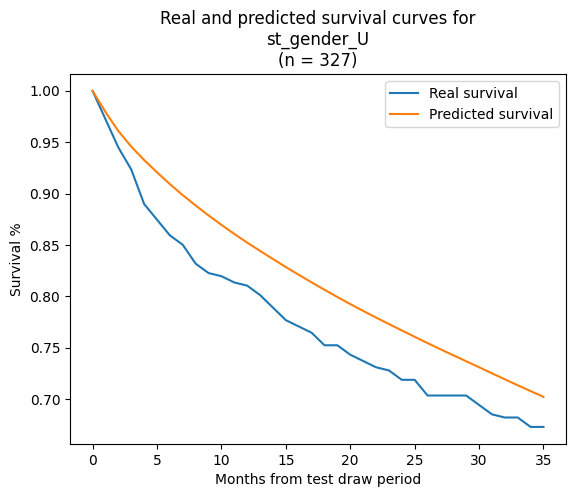

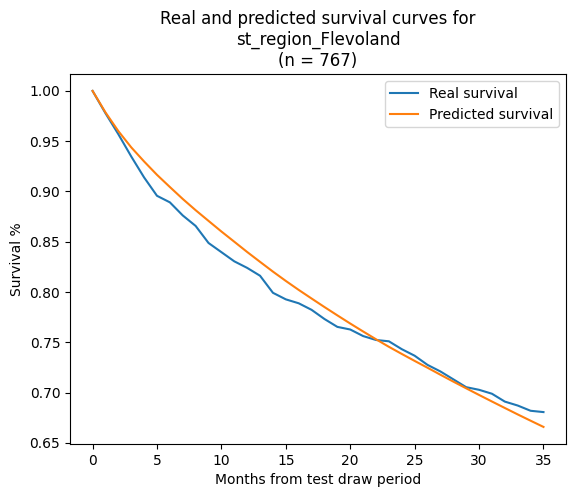

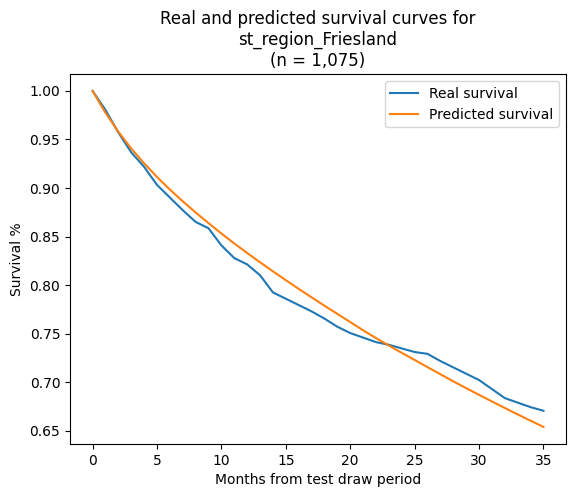

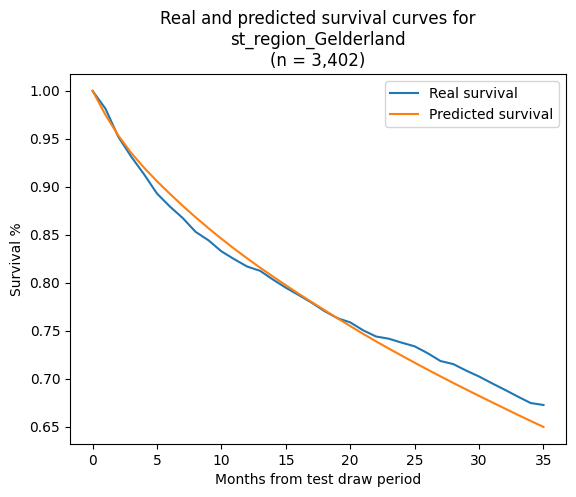

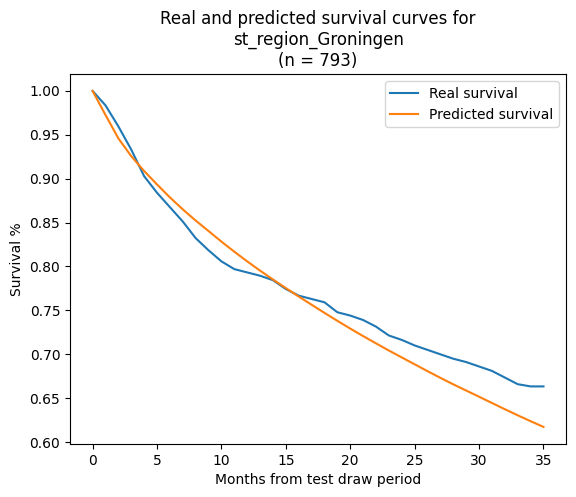

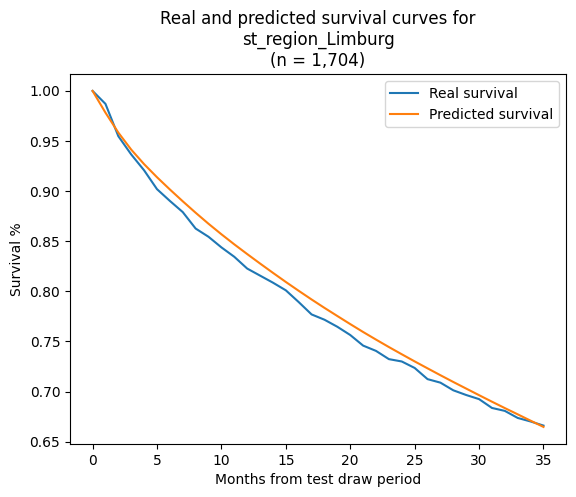

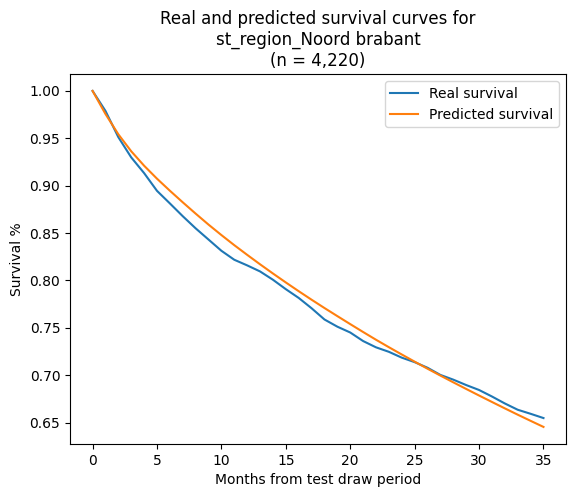

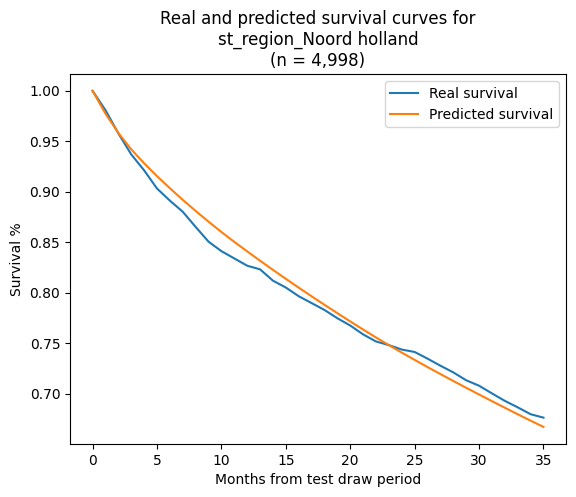

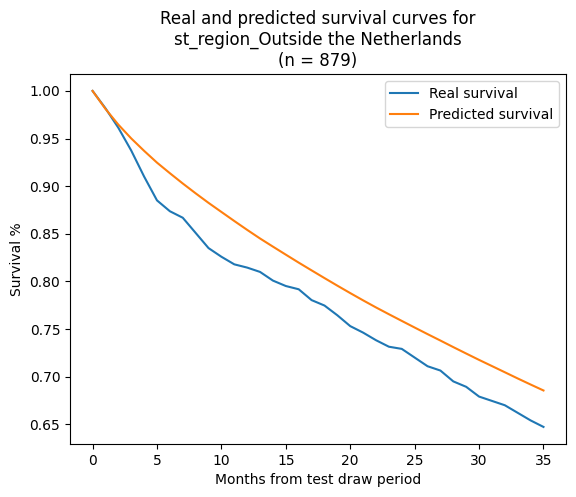

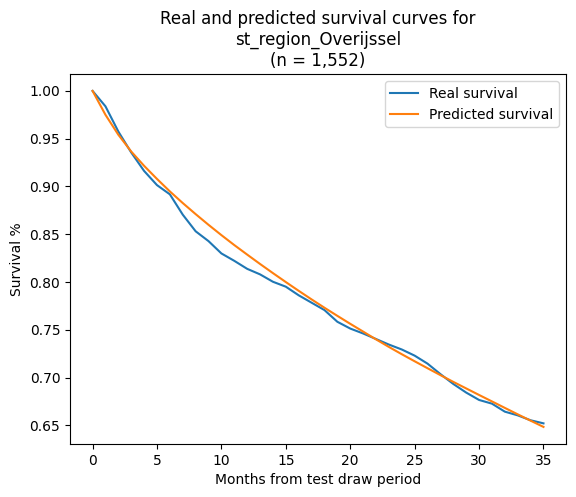

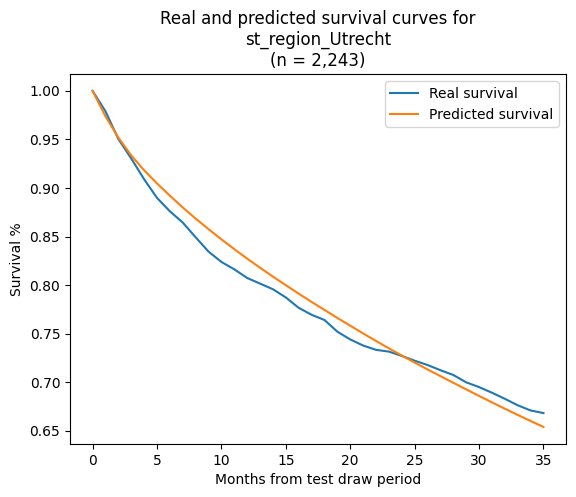

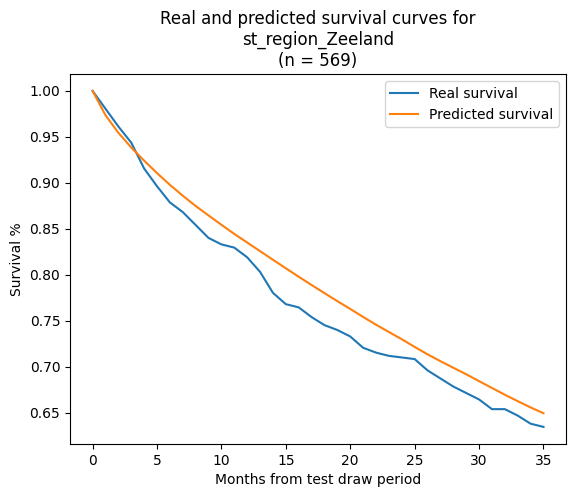

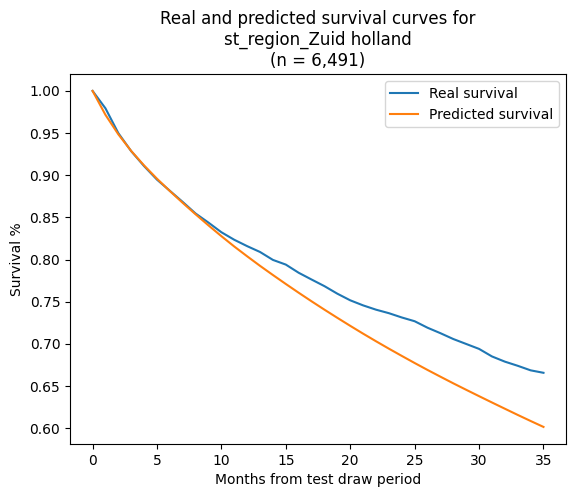

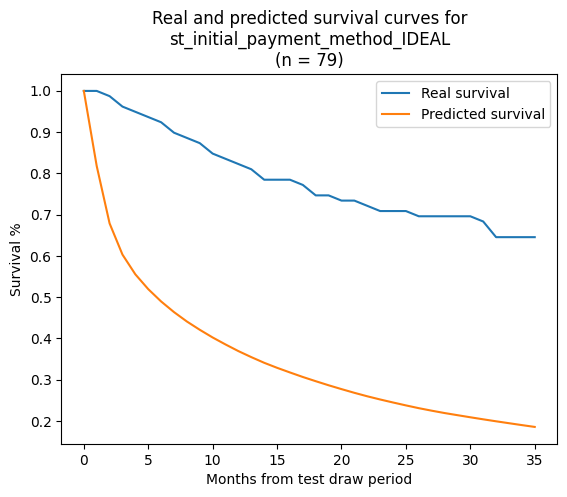

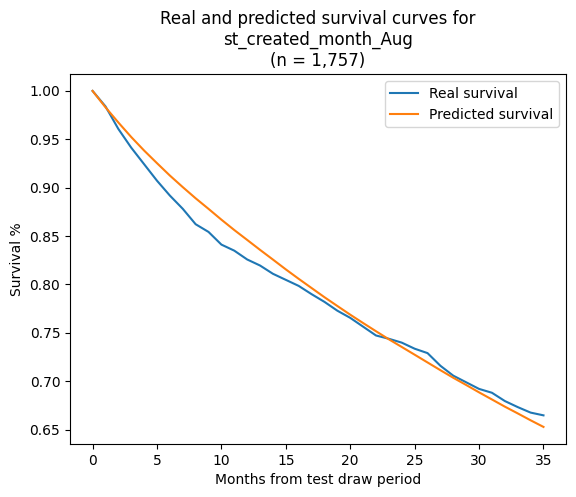

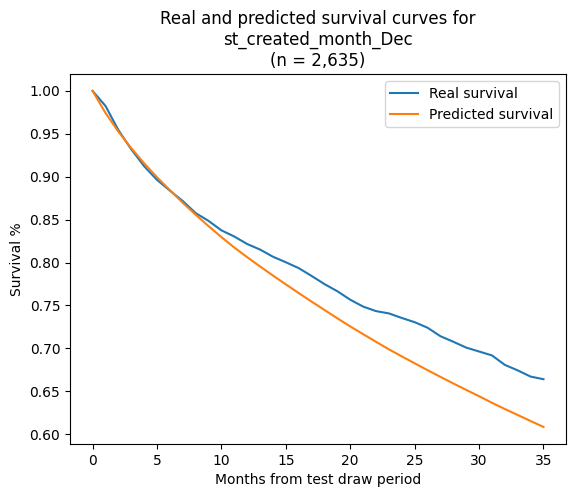

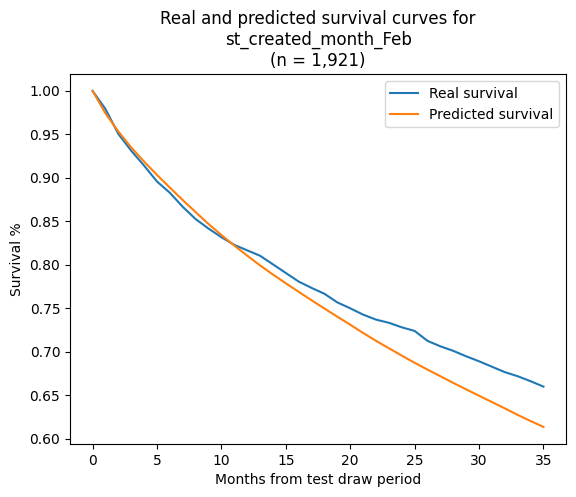

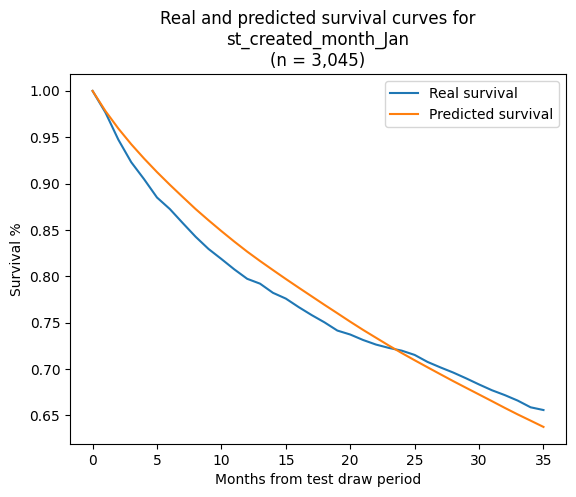

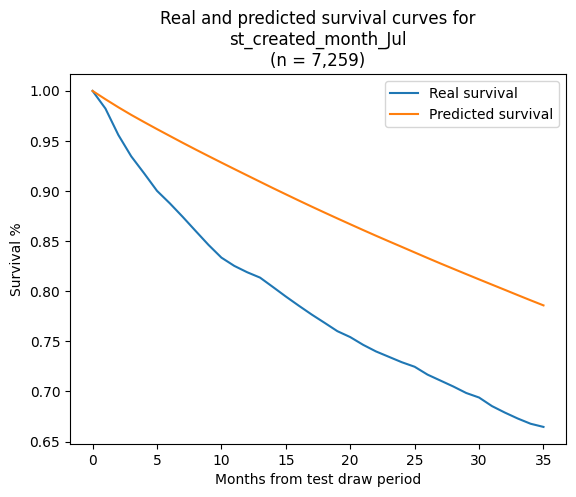

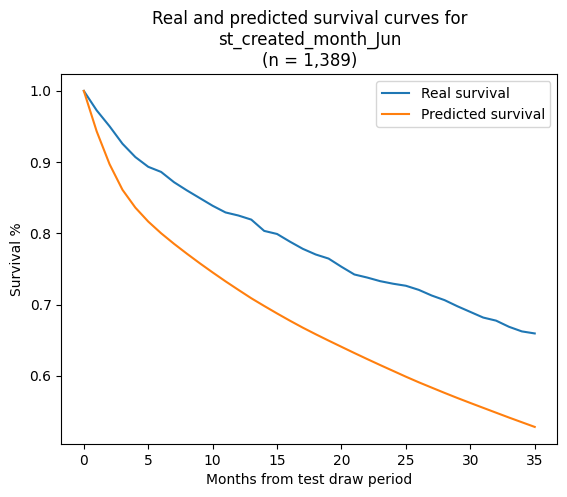

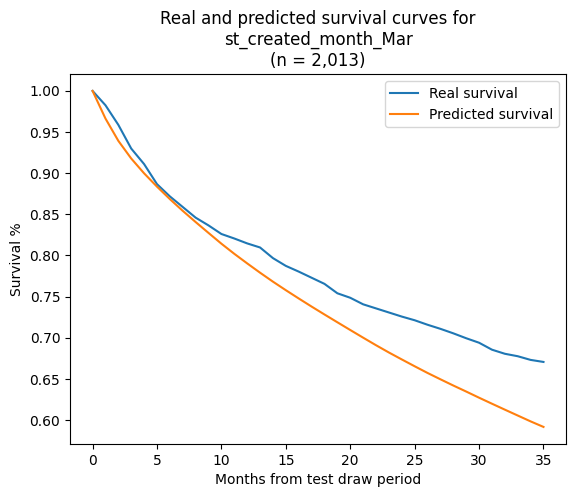

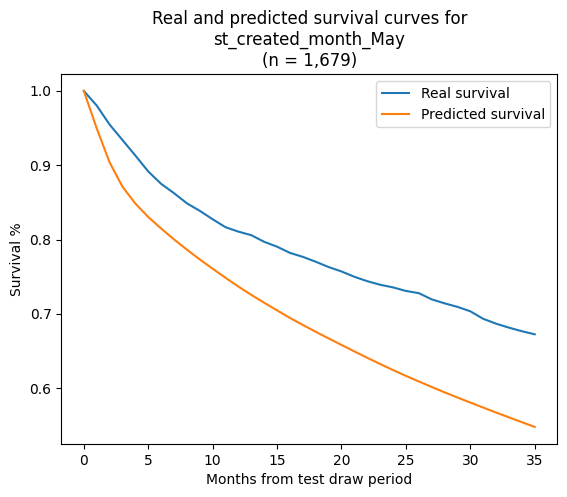

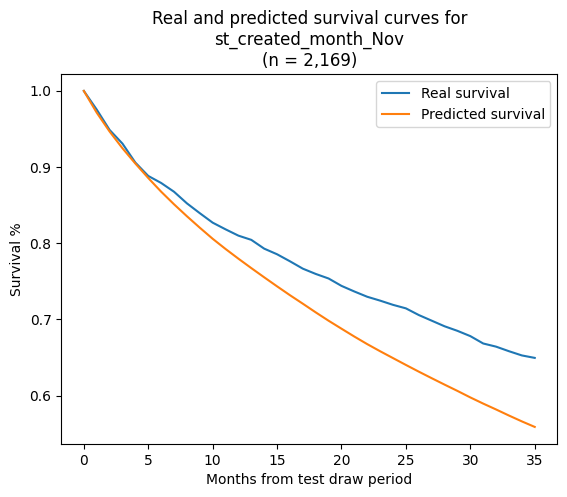

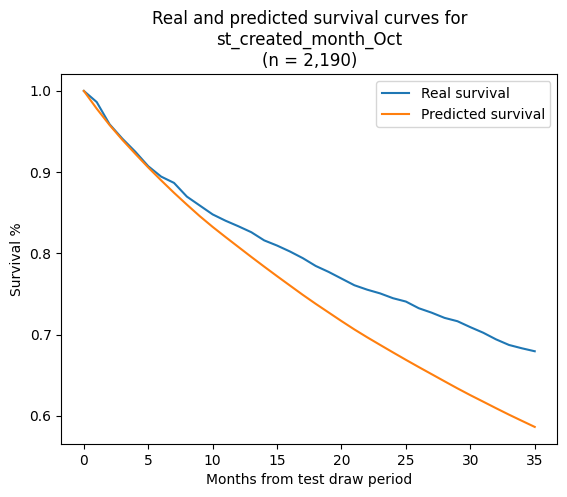

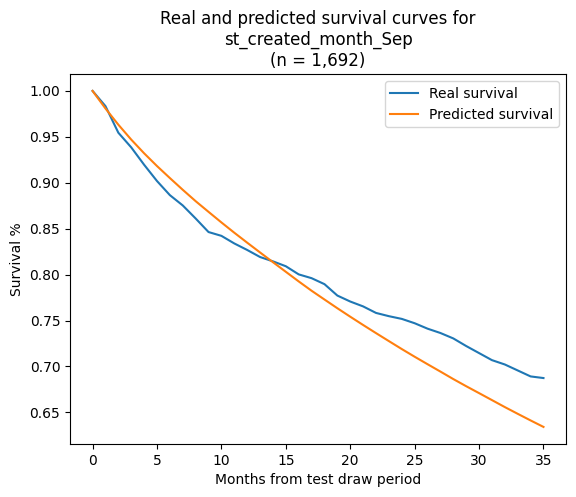

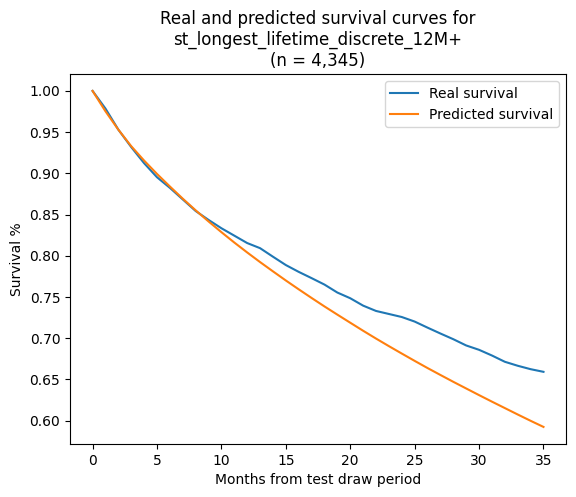

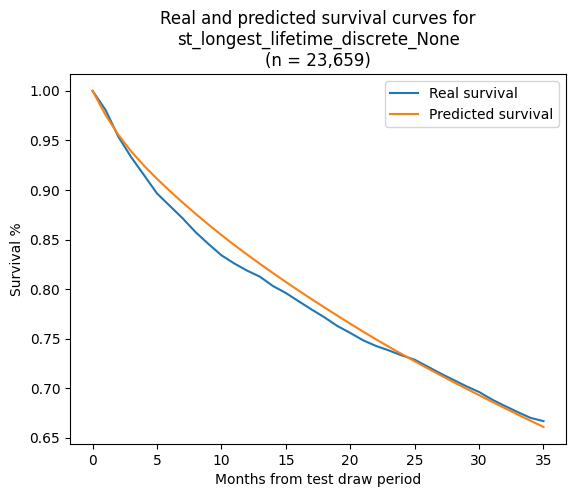

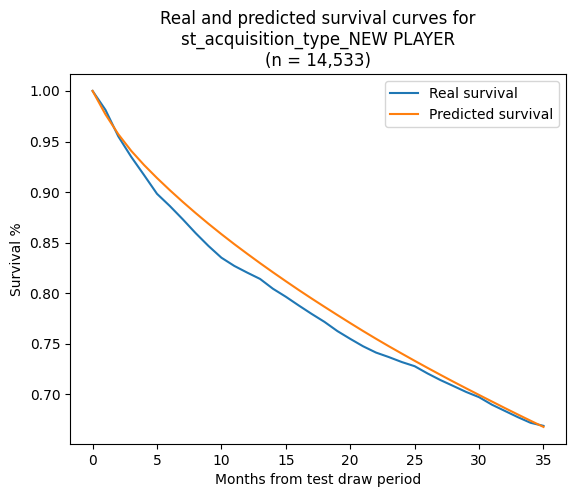

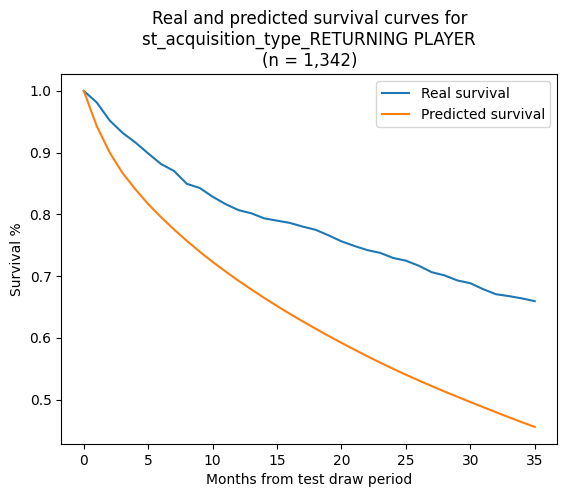

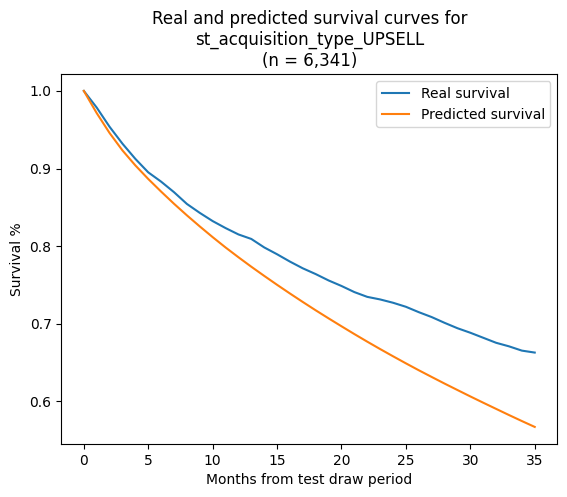

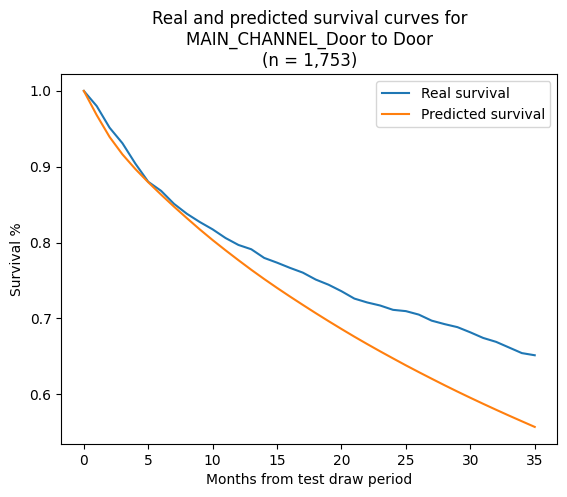

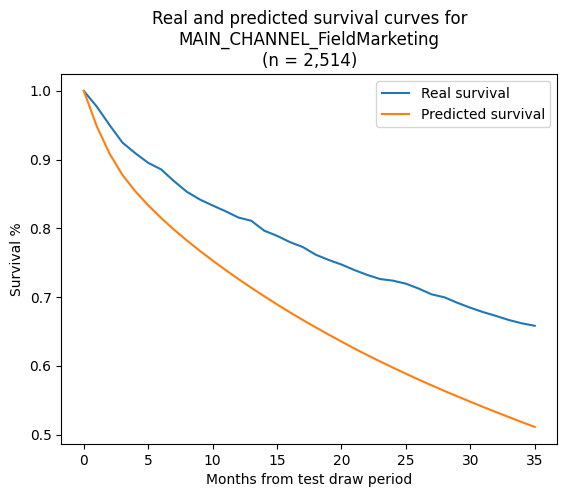

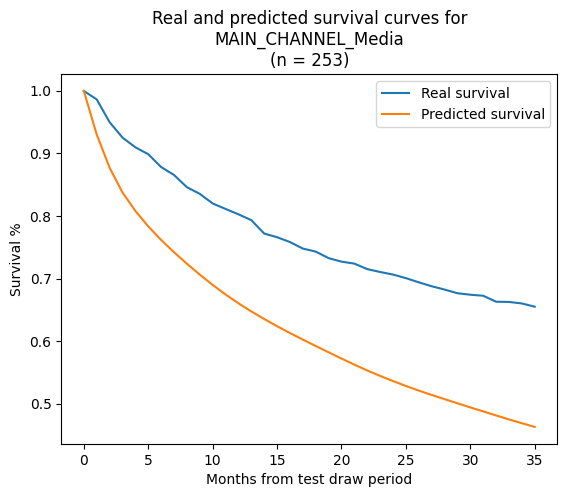

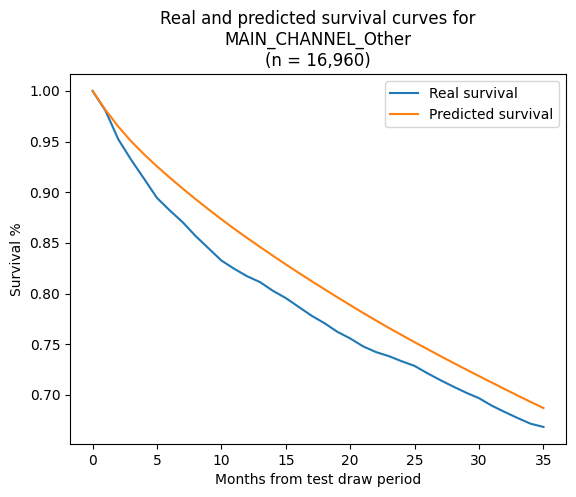

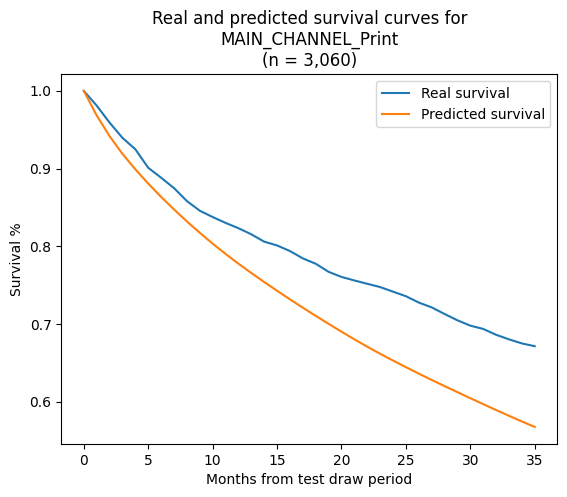

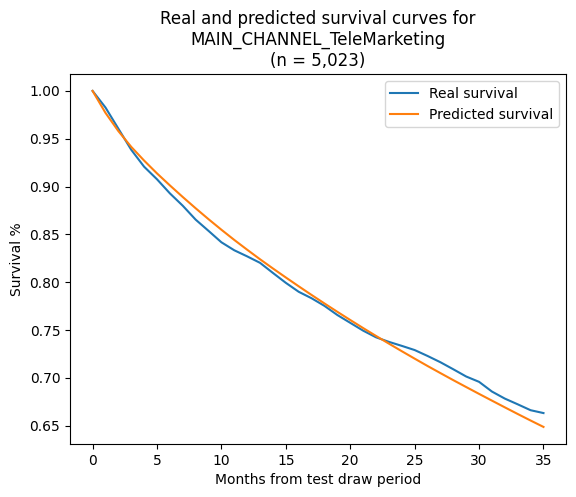

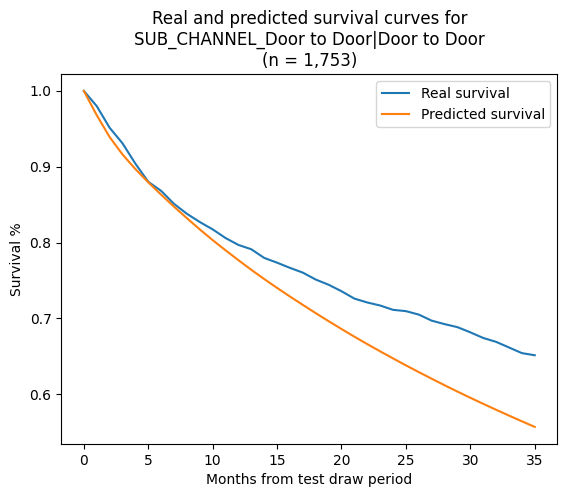

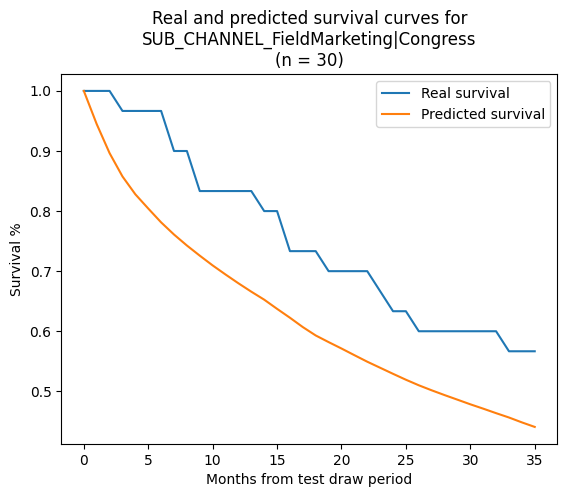

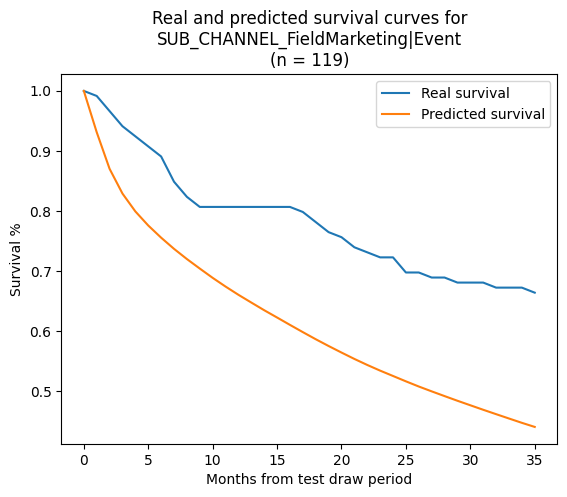

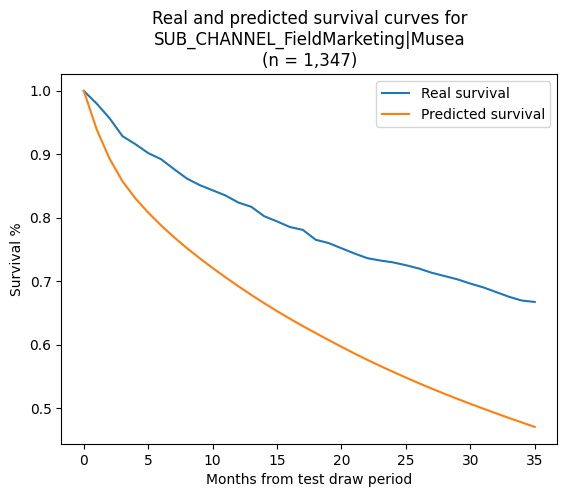

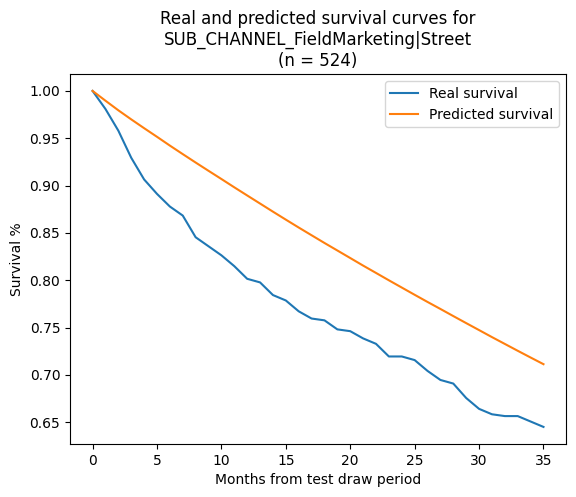

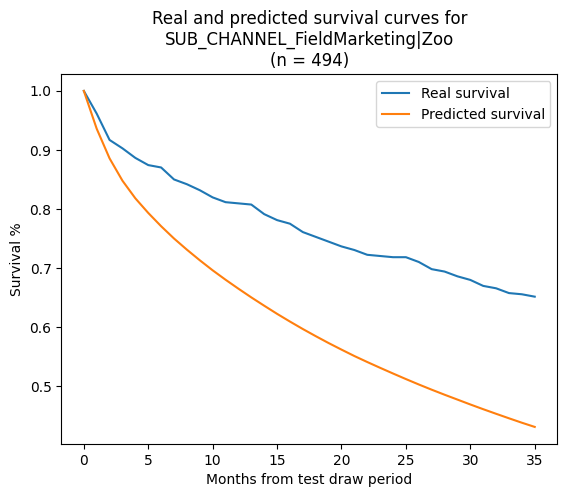

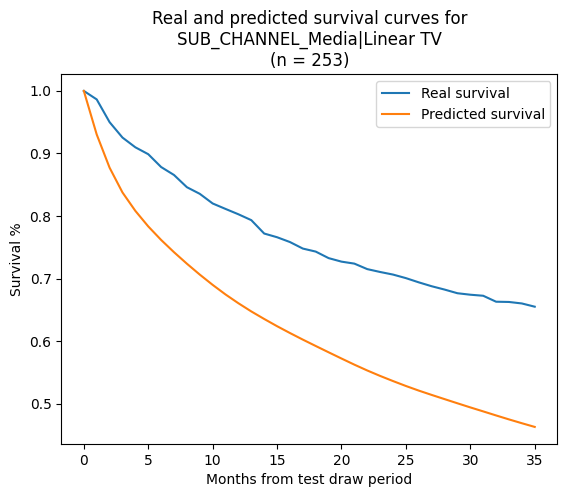

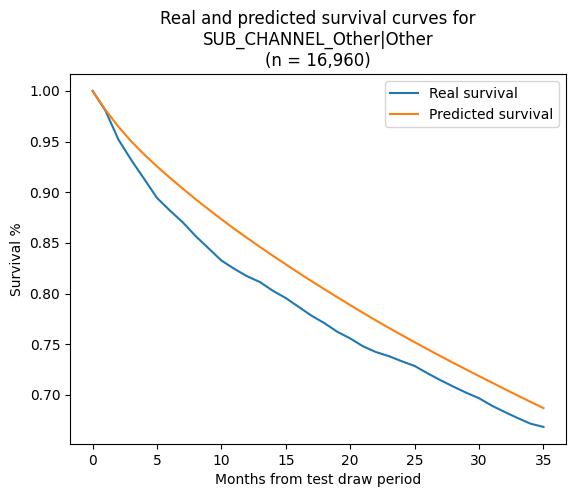

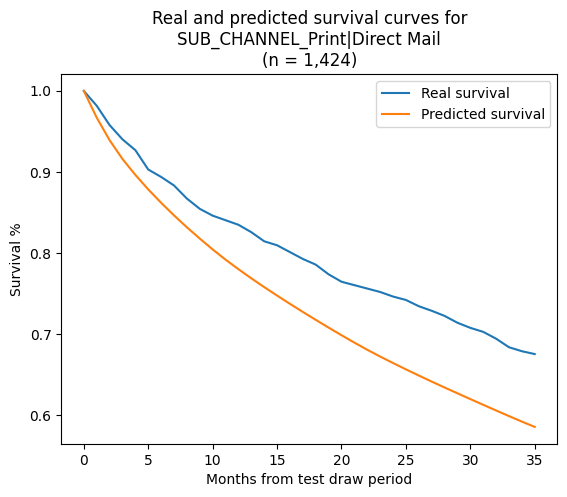

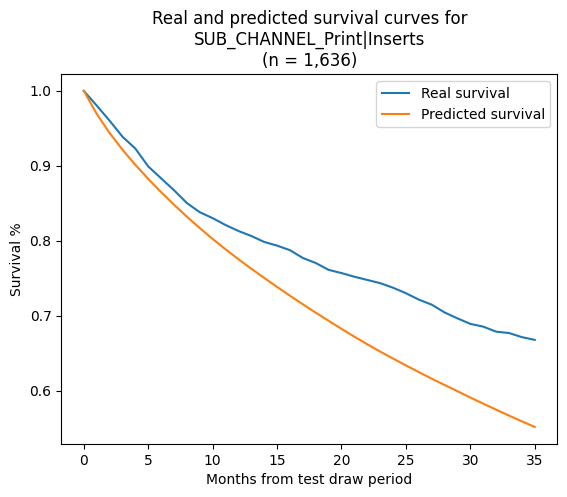

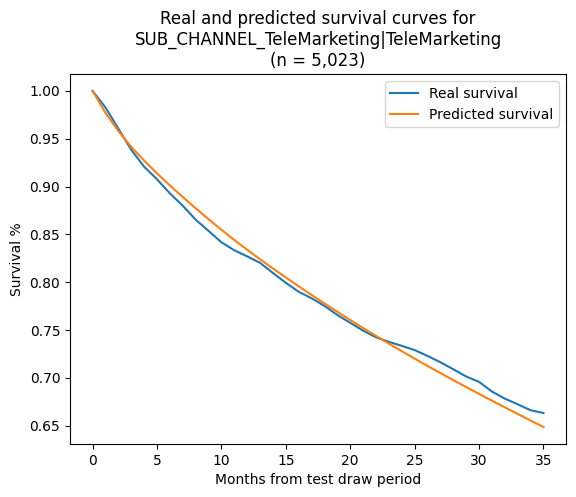

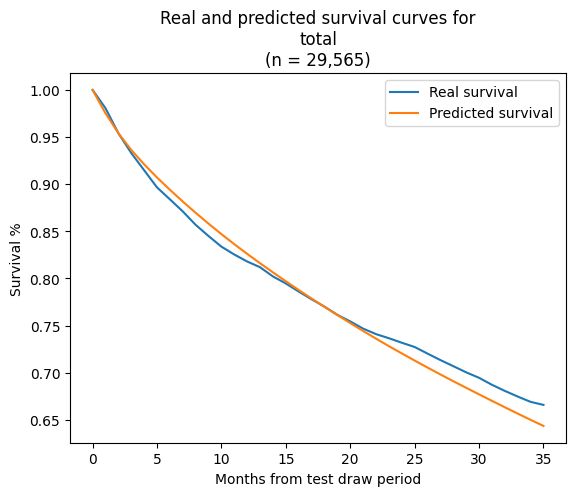

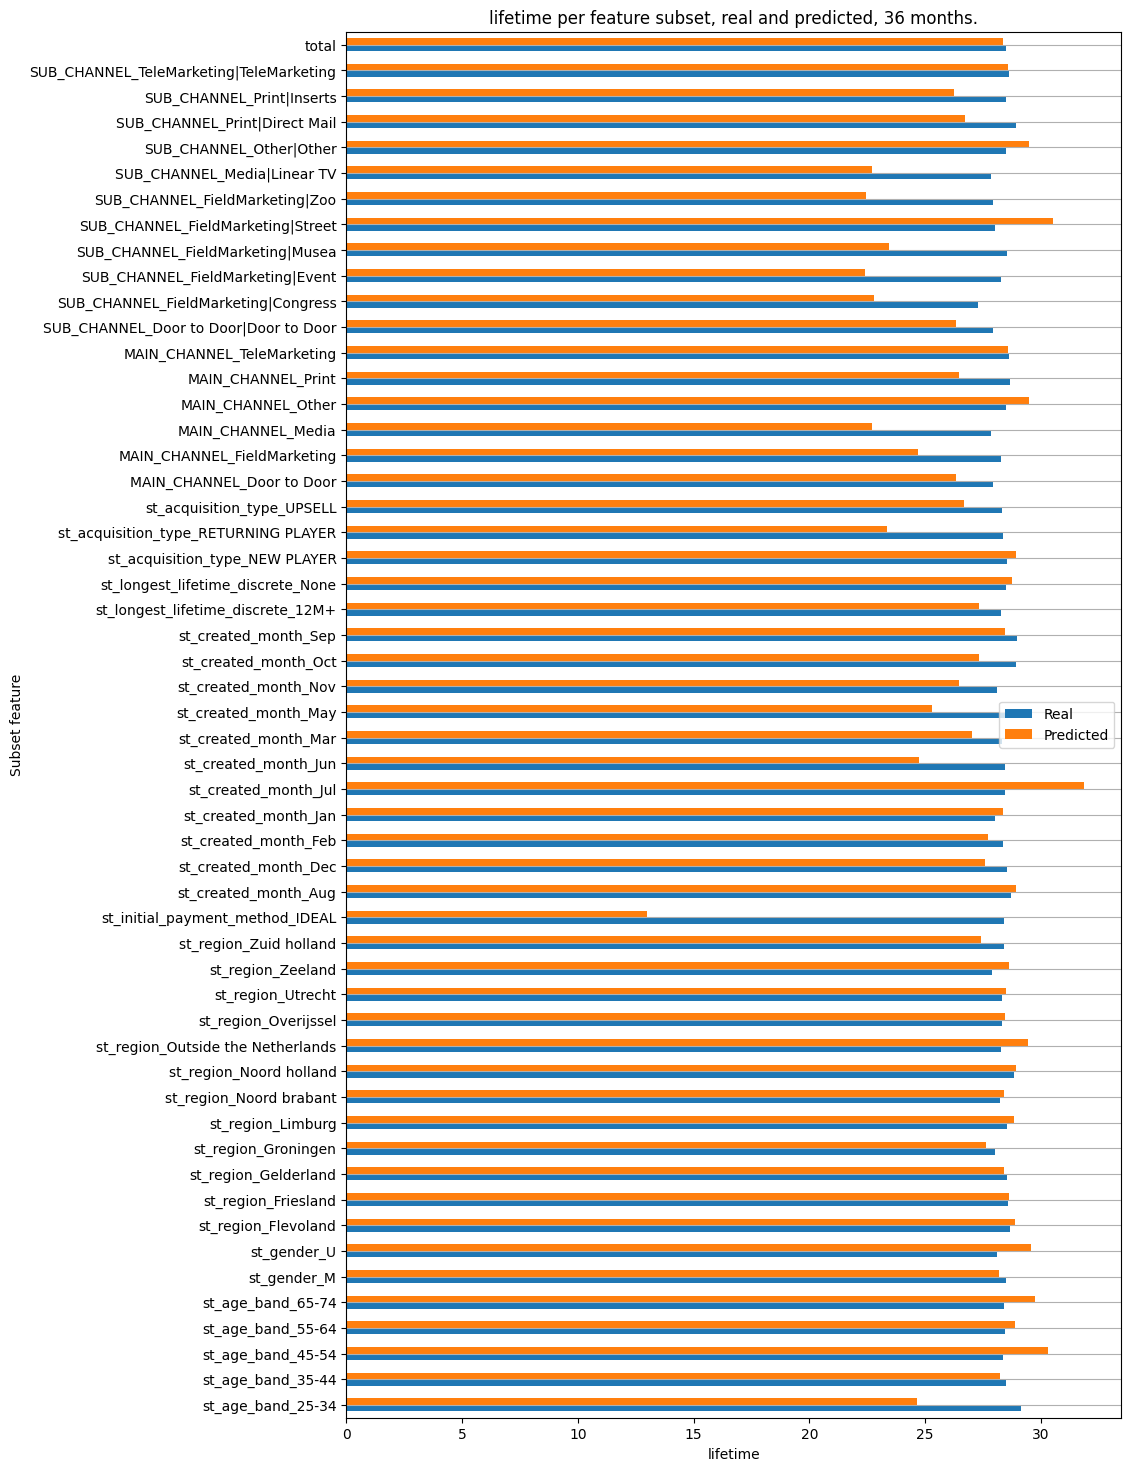

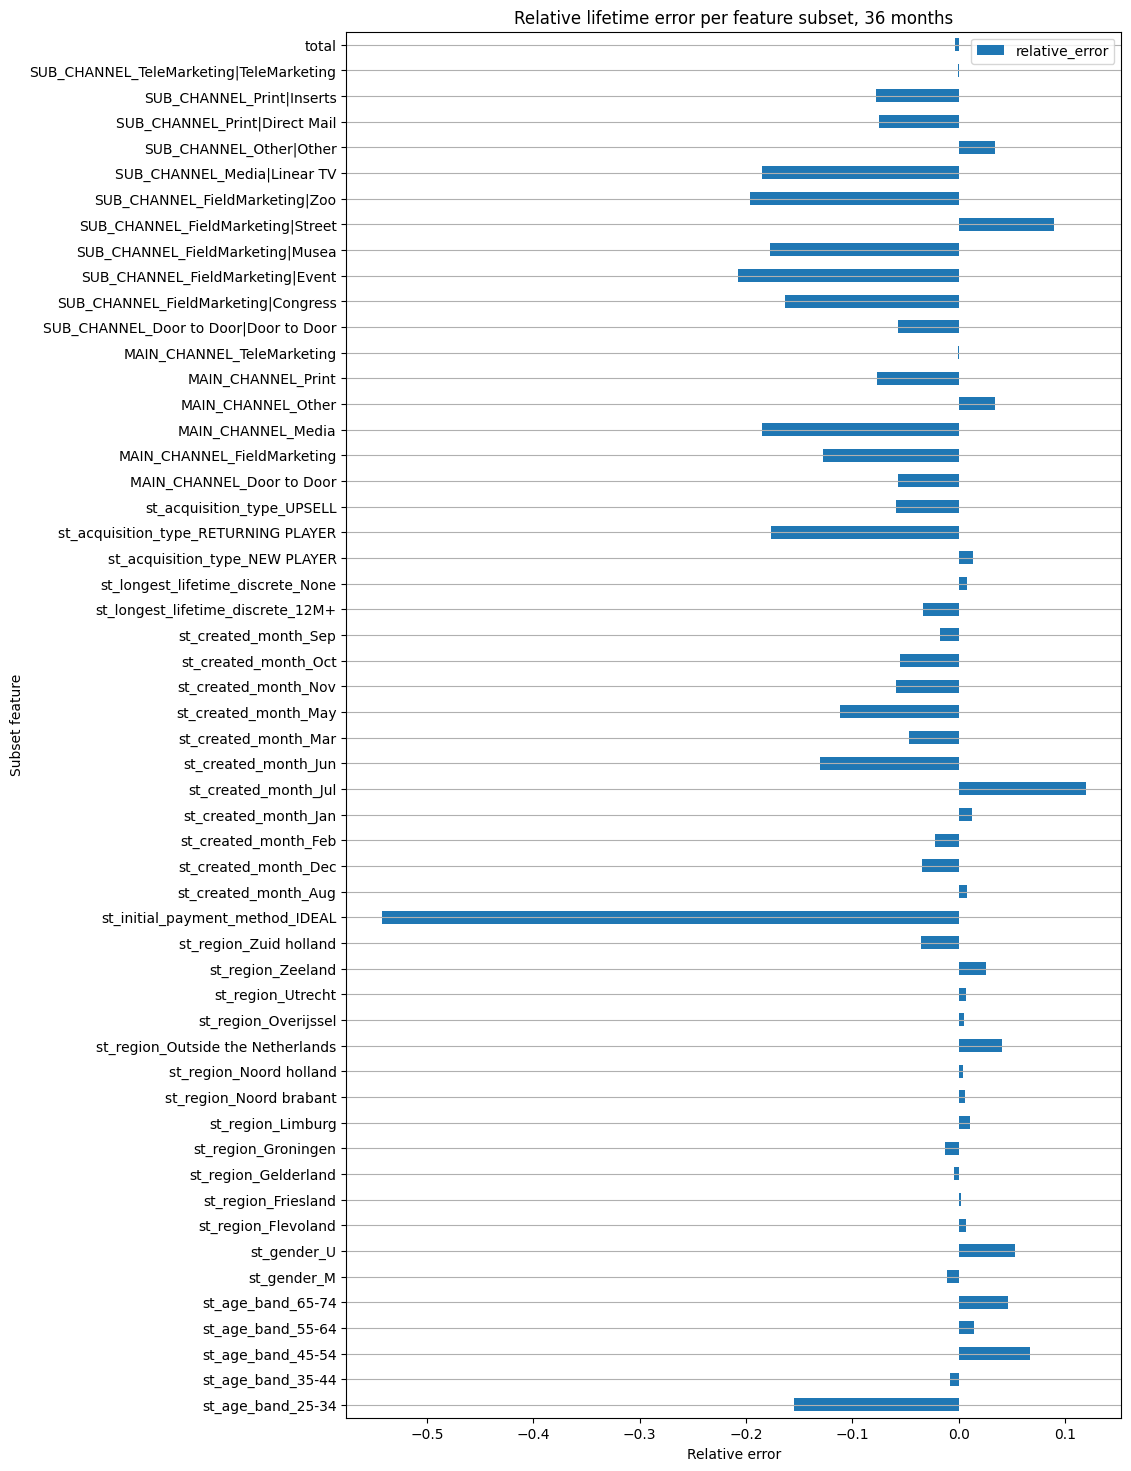

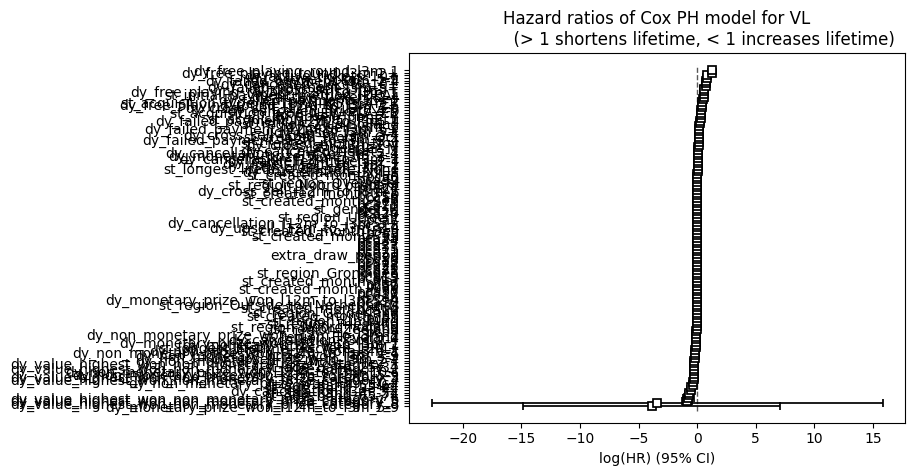

INFO:root:Untransformed data has columns: Index(['lottery', 'customer_id', 'ticket_id', 'start_draw_year_month',
       'end_draw_year_month', 'draw_period_number', 'extra_draw_period',
       'st_age_band', 'st_stratify_age_band_85_plus',
       'st_stratify_age_band_75_84',
       ...
       'channel_id_telemarketing|telemarketing|cross sell_attribution',
       'channel_id_telemarketing|telemarketing|existing_attribution',
       'channel_id_telemarketing|telemarketing|lapsed_attribution',
       'channel_id_telemarketing|telemarketing|partially addressed_attribution',
       'channel_id_telemarketing|telemarketing|other_attribution',
       'other_channel_attribution', 'start_time', 'end_time',
       'insert_datetime', 'index_col'],
      dtype='object', length=138)


INFO:root:Setting column names to lower case


INFO:root:Getting column dtypes from configs


INFO:root:Getting feature dict per attribute for feature_key = column_datatype


INFO:root:Setting column datatypes as: {'st_age_band': 'category', 'st_gender': 'category', 'st_region': 'category', 'st_initial_payment_method': 'category', 'st_created_month': 'category', 'st_longest_lifetime_discrete': 'category', 'st_acquisition_type': 'category', 'dy_active_tickets': 'category', 'dy_cancelled_tickets': 'category', 'dy_cancellation_l3m': 'category', 'dy_cancellation_l12m_to_l3m': 'category', 'dy_upsell_l3m': 'category', 'dy_upsell_l12m_to_l3m': 'category', 'dy_cross_sell_l3m': 'category', 'dy_cross_sell_l12m_to_l3m': 'category', 'dy_value_highest_won_non_monetary_prize_category': 'category', 'dy_monetary_prize_won_l3m': 'category', 'dy_monetary_prize_won_l12m_to_l3m': 'category', 'dy_non_monetary_prize_won_l3m': 'category', 'dy_non_monetary_prize_won_l12m_to_l3m': 'category', 'dy_add_on': 'category', 'dy_free_playing_round_l3m': 'category', 'dy_free_playing_round_l12m_to_l3m': 'category', 'dy_failed_payment_l3m': 'category', 'dy_failed_payment_l12m_to_l3m': 'catego

INFO:root:Columns included in pre processing: ['st_age_band', 'st_gender', 'st_region', 'st_initial_payment_method', 'st_created_month', 'st_longest_lifetime_discrete', 'st_acquisition_type', 'channel_id_door to door|door to door|_attribution', 'channel_id_e-mail|internal e-mail|cold_attribution', 'channel_id_e-mail|internal e-mail|cross sell_attribution', 'channel_id_e-mail|internal e-mail|existing_attribution', 'channel_id_e-mail|internal e-mail|lapsed_attribution', 'channel_id_e-mail|internal e-mail|partially addressed_attribution', 'channel_id_e-mail|internal e-mail|other_attribution', 'channel_id_fieldmarketing|congress|_attribution', 'channel_id_fieldmarketing|event|_attribution', 'channel_id_fieldmarketing|musea|_attribution', 'channel_id_fieldmarketing|street|_attribution', 'channel_id_fieldmarketing|themepark|_attribution', 'channel_id_fieldmarketing|zoo|_attribution', 'channel_id_media|linear tv|_attribution', 'channel_id_online|affiliate|_attribution', 'channel_id_online|dis

INFO:root:Shape before transform: (593892, 68)


INFO:root:Shape after transform: (593892, 133)


INFO:root:Transformed data has columns: Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9',
       ...
       'dy_failed_payment_l3m_2-4', 'dy_failed_payment_l3m_5+',
       'dy_failed_payment_l12m_to_l3m_1', 'dy_failed_payment_l12m_to_l3m_2-4',
       'dy_failed_payment_l12m_to_l3m_5+', 'extra_draw_period',
       'st_stratify_age_band_75_84', 'st_stratify_age_band_85_plus',
       'start_time', 'end_time'],
      dtype='object', length=131)


INFO:root:Untransformed data has columns: Index(['lottery', 'customer_id', 'ticket_id', 'start_draw_year_month',
       'end_draw_year_month', 'draw_period_number', 'extra_draw_period',
       'st_age_band', 'st_stratify_age_band_85_plus',
       'st_stratify_age_band_75_84',
       ...
       'channel_id_telemarketing|telemarketing|existing_attribution',
       'channel_id_telemarketing|telemarketing|lapsed_attribution',
       'channel_id_telemarketing|telemarketing|partially addressed_attribution',
       'channel_id_telemarketing|telemarketing|other_attribution',
       'other_channel_attribution', 'start_time', 'end_time',
       'churn_current_month', 'insert_datetime', 'index_col'],
      dtype='object', length=139)


INFO:root:Setting column names to lower case


INFO:root:Getting column dtypes from configs


INFO:root:Getting feature dict per attribute for feature_key = column_datatype


INFO:root:Setting column datatypes as: {'st_age_band': 'category', 'st_gender': 'category', 'st_region': 'category', 'st_initial_payment_method': 'category', 'st_created_month': 'category', 'st_longest_lifetime_discrete': 'category', 'st_acquisition_type': 'category', 'dy_active_tickets': 'category', 'dy_cancelled_tickets': 'category', 'dy_cancellation_l3m': 'category', 'dy_cancellation_l12m_to_l3m': 'category', 'dy_upsell_l3m': 'category', 'dy_upsell_l12m_to_l3m': 'category', 'dy_cross_sell_l3m': 'category', 'dy_cross_sell_l12m_to_l3m': 'category', 'dy_value_highest_won_non_monetary_prize_category': 'category', 'dy_monetary_prize_won_l3m': 'category', 'dy_monetary_prize_won_l12m_to_l3m': 'category', 'dy_non_monetary_prize_won_l3m': 'category', 'dy_non_monetary_prize_won_l12m_to_l3m': 'category', 'dy_add_on': 'category', 'dy_free_playing_round_l3m': 'category', 'dy_free_playing_round_l12m_to_l3m': 'category', 'dy_failed_payment_l3m': 'category', 'dy_failed_payment_l12m_to_l3m': 'catego

INFO:root:Event column found in dataframe, will include in output dataframe


INFO:root:Columns included in pre processing: ['st_age_band', 'st_gender', 'st_region', 'st_initial_payment_method', 'st_created_month', 'st_longest_lifetime_discrete', 'st_acquisition_type', 'channel_id_door to door|door to door|_attribution', 'channel_id_e-mail|internal e-mail|cold_attribution', 'channel_id_e-mail|internal e-mail|cross sell_attribution', 'channel_id_e-mail|internal e-mail|existing_attribution', 'channel_id_e-mail|internal e-mail|lapsed_attribution', 'channel_id_e-mail|internal e-mail|partially addressed_attribution', 'channel_id_e-mail|internal e-mail|other_attribution', 'channel_id_fieldmarketing|congress|_attribution', 'channel_id_fieldmarketing|event|_attribution', 'channel_id_fieldmarketing|musea|_attribution', 'channel_id_fieldmarketing|street|_attribution', 'channel_id_fieldmarketing|themepark|_attribution', 'channel_id_fieldmarketing|zoo|_attribution', 'channel_id_media|linear tv|_attribution', 'channel_id_online|affiliate|_attribution', 'channel_id_online|dis

INFO:root:Shape before transform: (412537, 68)


INFO:root:Shape after transform: (412537, 133)


INFO:root:Transformed data has columns: Index(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8',
       'pca9',
       ...
       'dy_failed_payment_l3m_5+', 'dy_failed_payment_l12m_to_l3m_1',
       'dy_failed_payment_l12m_to_l3m_2-4', 'dy_failed_payment_l12m_to_l3m_5+',
       'extra_draw_period', 'st_stratify_age_band_75_84',
       'st_stratify_age_band_85_plus', 'start_time', 'end_time',
       'churn_current_month'],
      dtype='object', length=132)


INFO:root:Baseline hazard:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
195         0.006219
196         0.005089
197         0.003680
198         0.006244
199         0.005304

[200 rows x 1 columns]


INFO:root:Calculating partial hazard rates


INFO:root:Partial hazards:


INFO:root:     00009ef3a080887320de15664b9909d7  00013e85d05e46b835d450fb1fa240ef  \
0                                 NaN                          2.918901   
1                            2.381558                          2.935214   
2                            1.662147                          2.935214   
3                            1.537275                          2.935214   
4                            1.537275                          3.577207   
..                                ...                               ...   
495                               NaN                               NaN   
496                               NaN                               NaN   
497                               NaN                               NaN   
498                               NaN                               NaN   
499                               NaN                               NaN   

     000342d9d68c53475950aa0d9b28f2bf  00036e8ff25fb73f1544251a74a968f9  \
0             

INFO:root:Calculating extrapolated baseline hazard


INFO:root:Extrapolating baseline hazard for times: [200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433


INFO:root:Truncating extrapolated hazard to h(t) >= 0.005


INFO:root:Baseline hazard after extrapolation:


INFO:root:     baseline hazard
0           0.000000
1           0.103561
2           0.092865
3           0.091859
4           0.057883
..               ...
495         0.005000
496         0.005000
497         0.005000
498         0.005000
499         0.005000

[500 rows x 1 columns]


INFO:root:Calculating hazard rates


INFO:root:Returning hazard rates instead of survival curves


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}


/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:603: RuntimeWarning: Mean of empty slice
  {k: np.nanmean(v) for k, v in simulated_hazard_predicted.items()}
/opt/ml/processing/input/code/src/tlv_evaluator.py:620: RuntimeWarning: Mean of empty slice
  np.nanmean(hazard_rates.values, axis=1, dtype=np.float64),
INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


0     0.000000
1     0.236483
2     0.211954
3     0.211543
4     0.130669
5     0.099927
6     0.084871
7     0.074299
8     0.069614
9     0.065834
10    0.061874
11    0.058421
12    0.057401
13    0.056744
14    0.049783
15    0.050263
16    0.044644
17    0.043175
18    0.038363
19    0.037360
dtype: float64
Plotting simulated survival curve for extra_draw_period


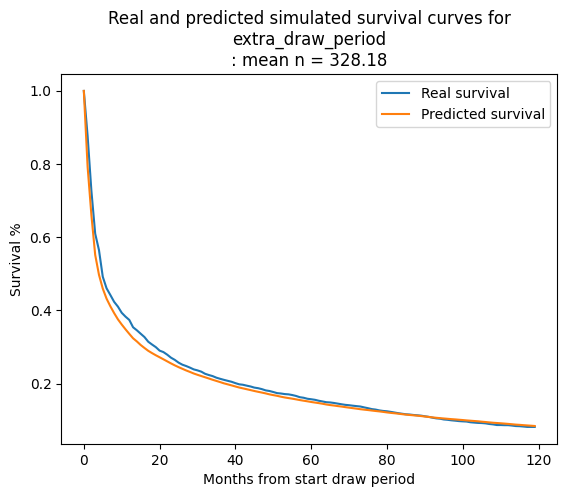

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_active_tickets_10+


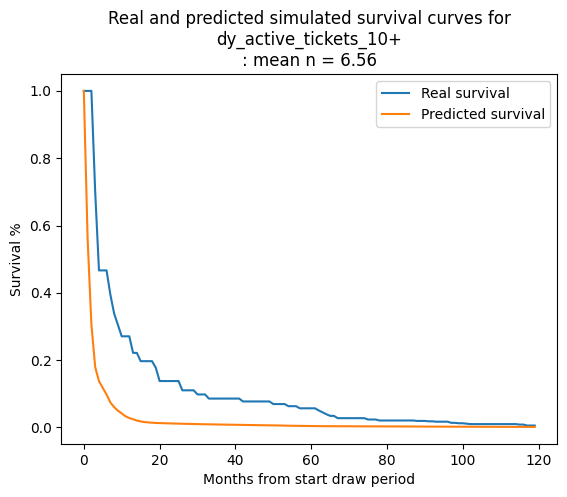

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_active_tickets_2-4


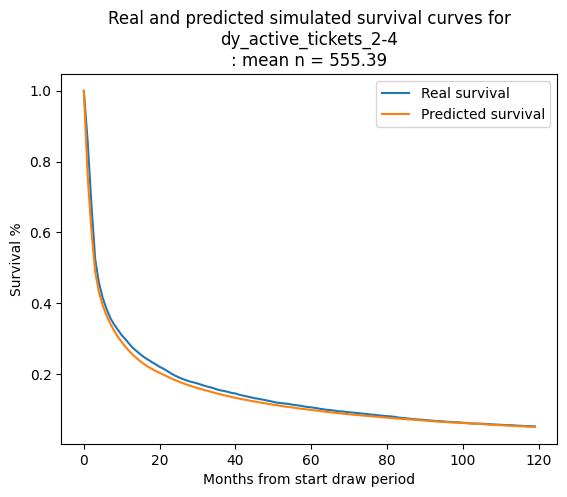

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_active_tickets_5-9


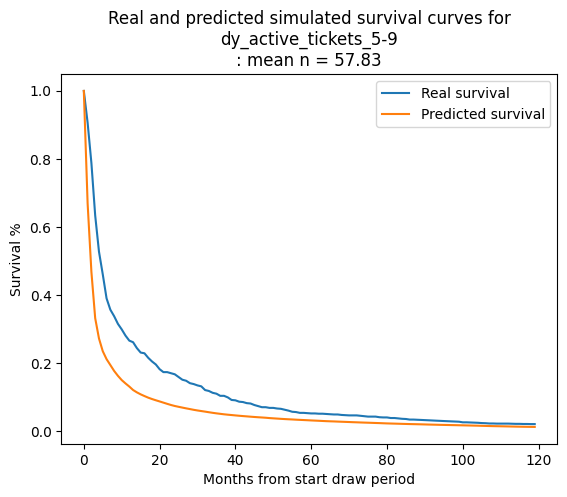

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancelled_tickets_1


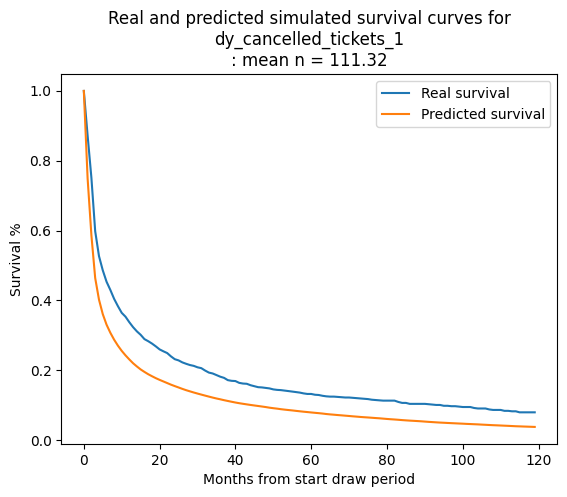

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancelled_tickets_10+


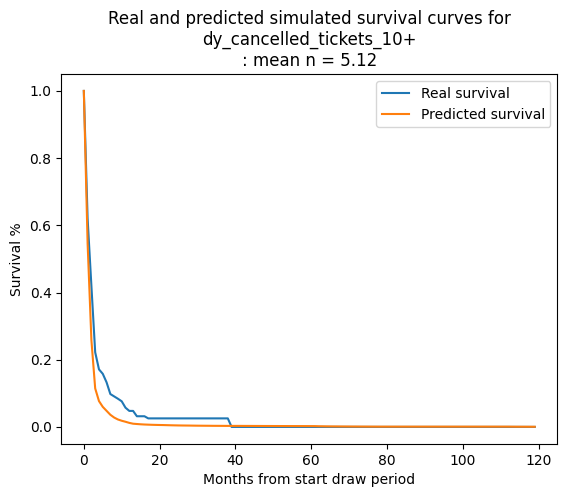

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancelled_tickets_2-4


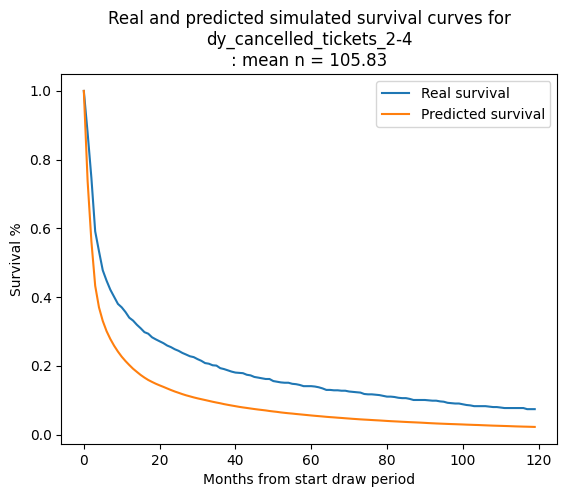

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancelled_tickets_5-9


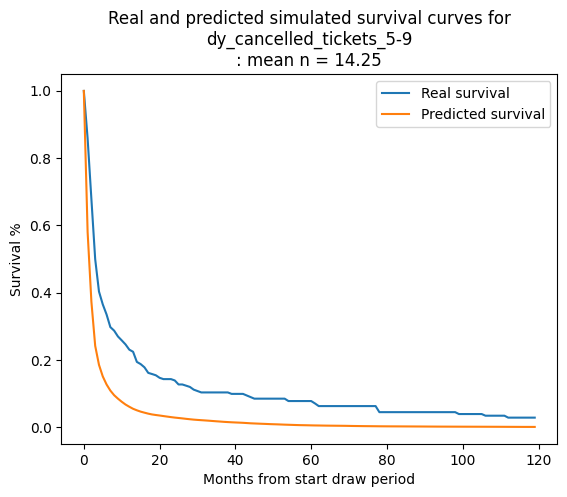

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l3m_1


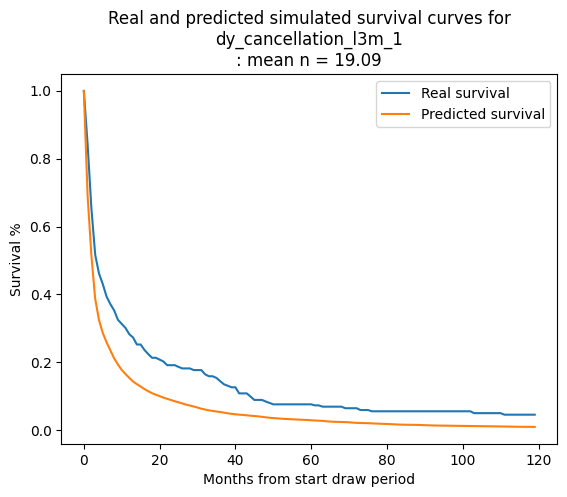

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l3m_2-4


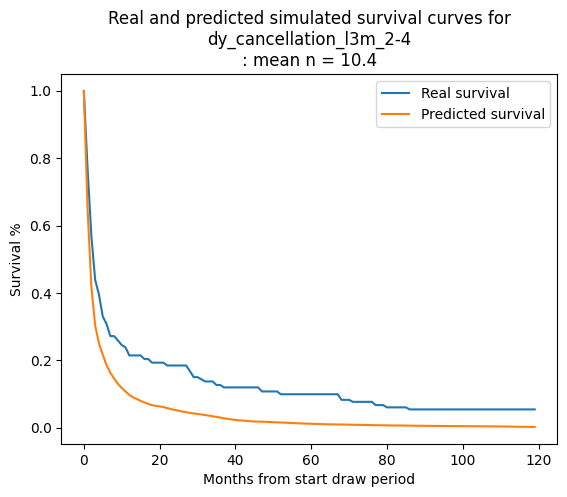

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l3m_5+


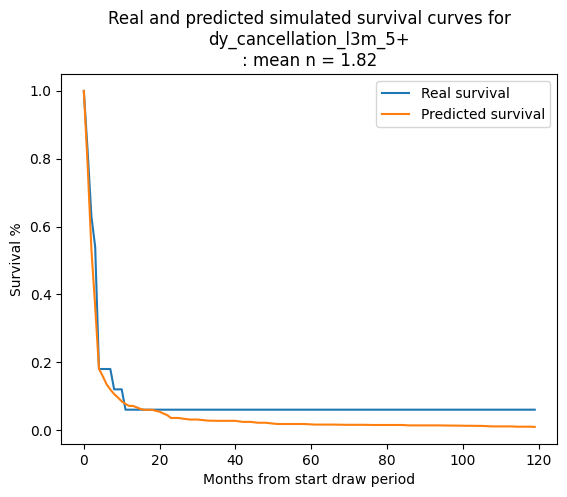

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l12m_to_l3m_1


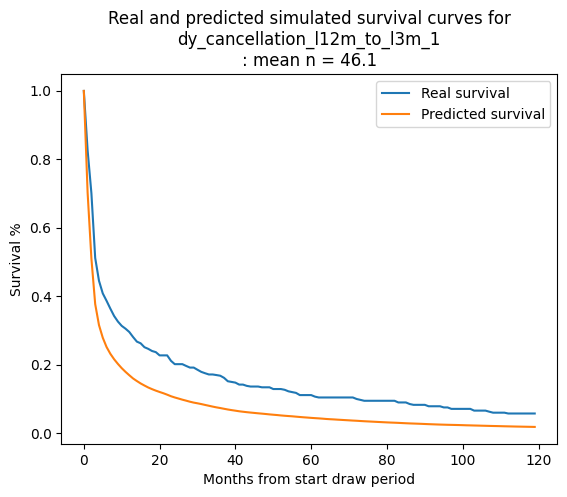

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l12m_to_l3m_2-4


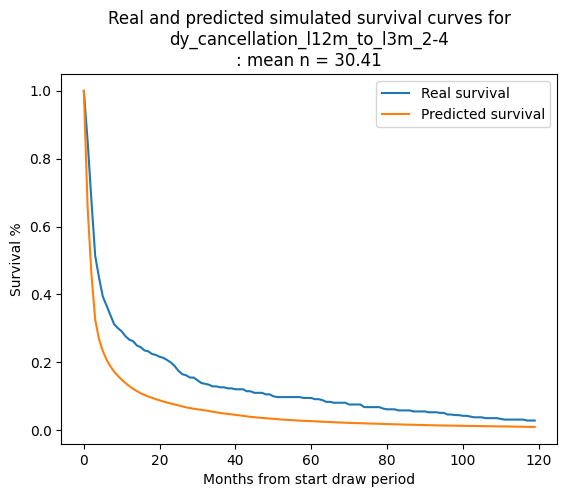

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cancellation_l12m_to_l3m_5+


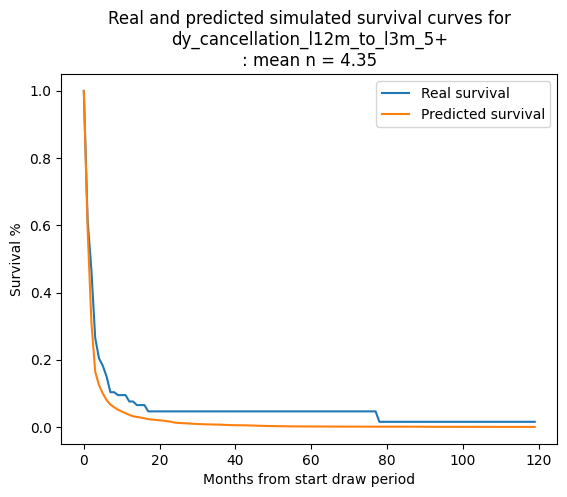

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l3m_1


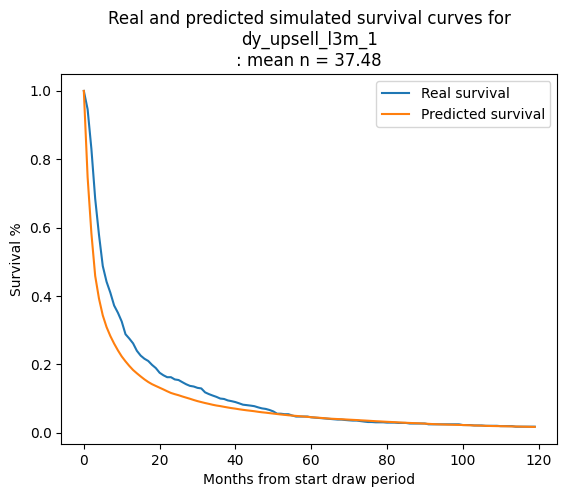

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l3m_2-4


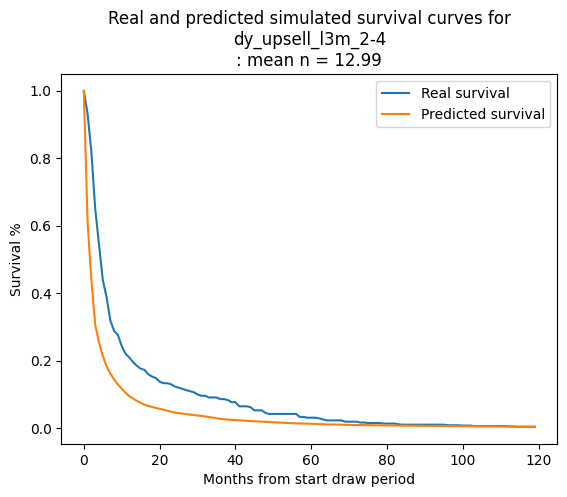

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l3m_5+


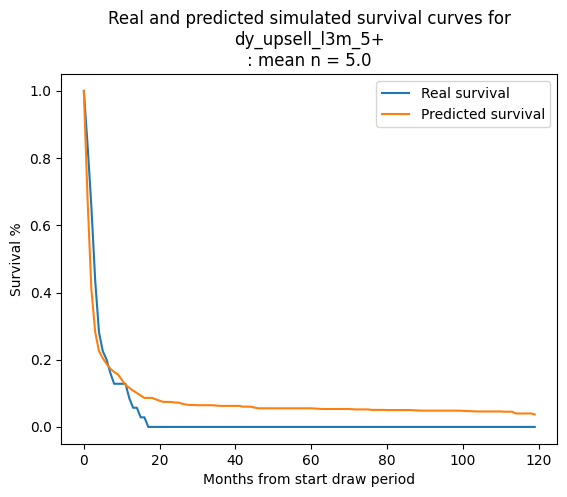

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l12m_to_l3m_1


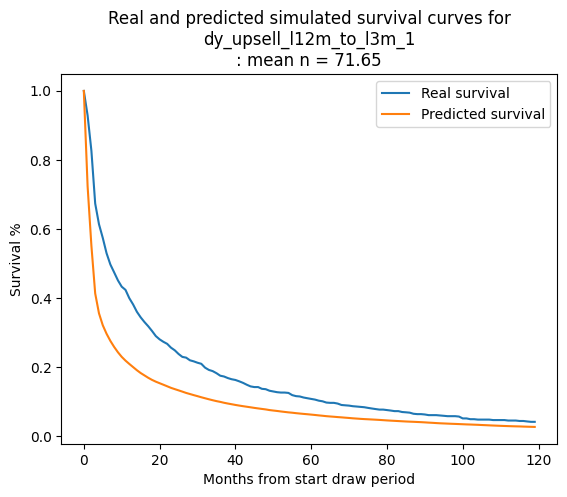

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l12m_to_l3m_2-4


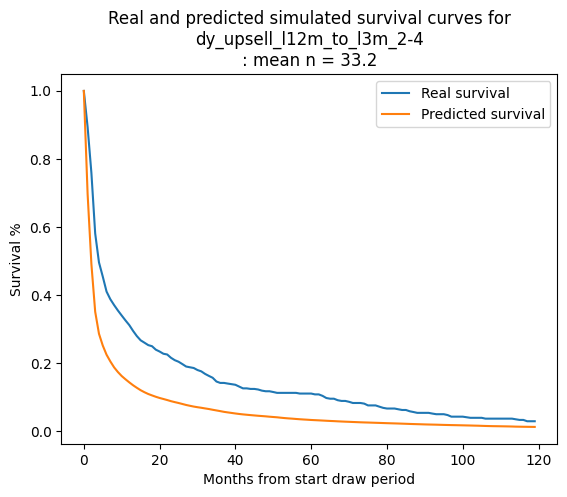

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_upsell_l12m_to_l3m_5+


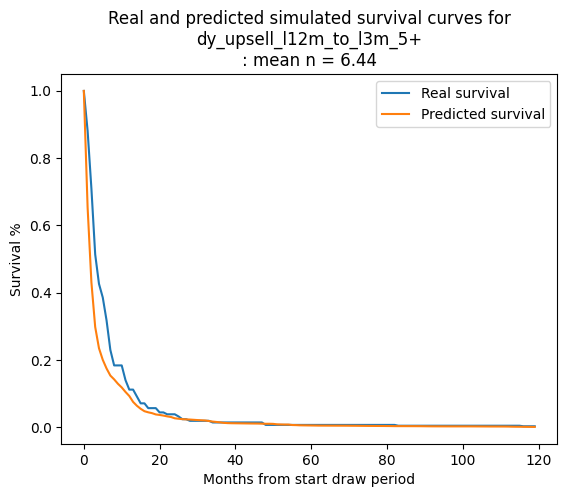

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l3m_1


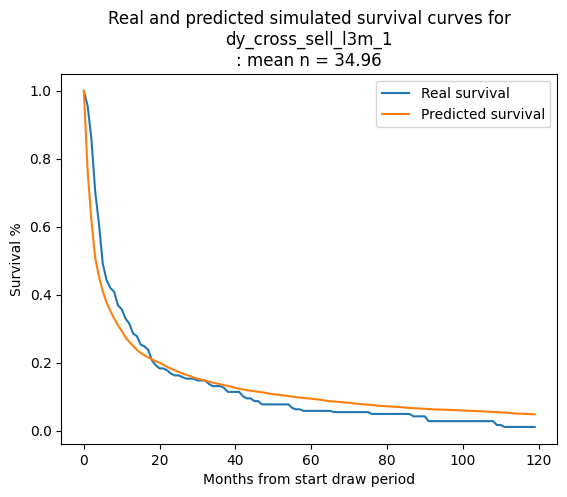

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l3m_2-4


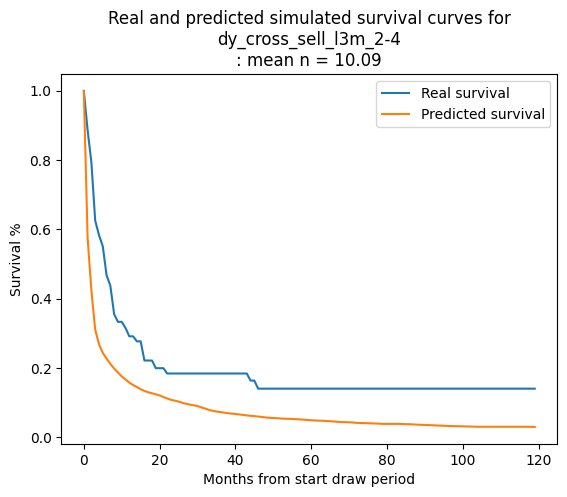

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l3m_5+


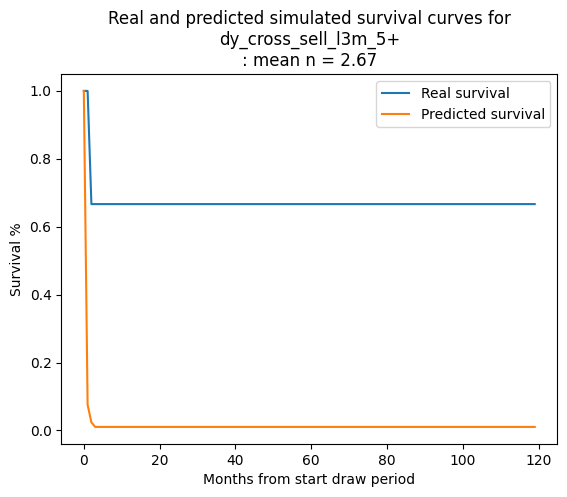

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l12m_to_l3m_1


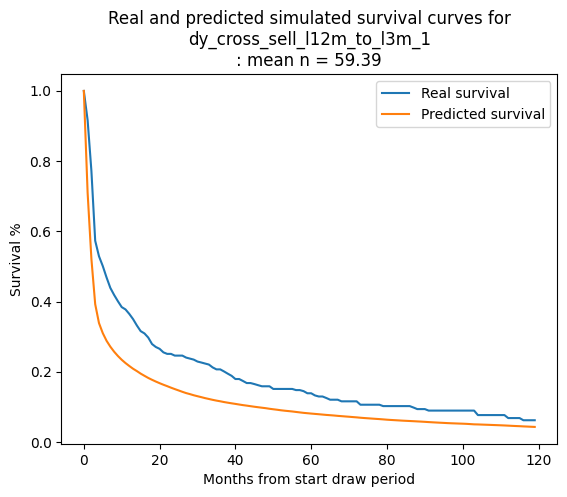

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l12m_to_l3m_2-4


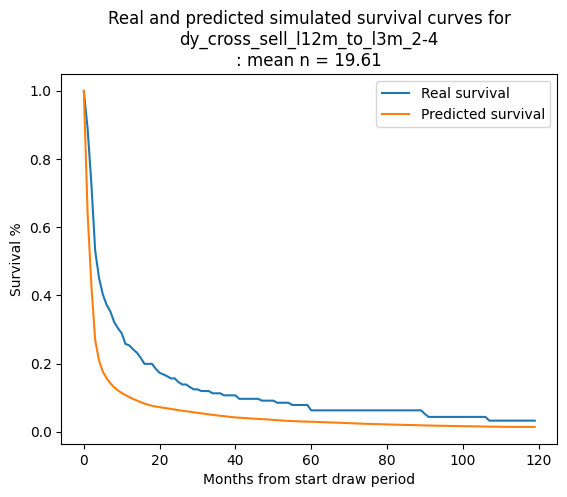

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_cross_sell_l12m_to_l3m_5+


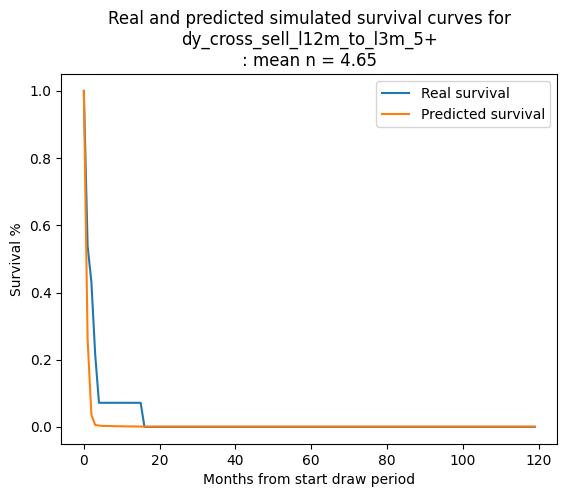

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_1


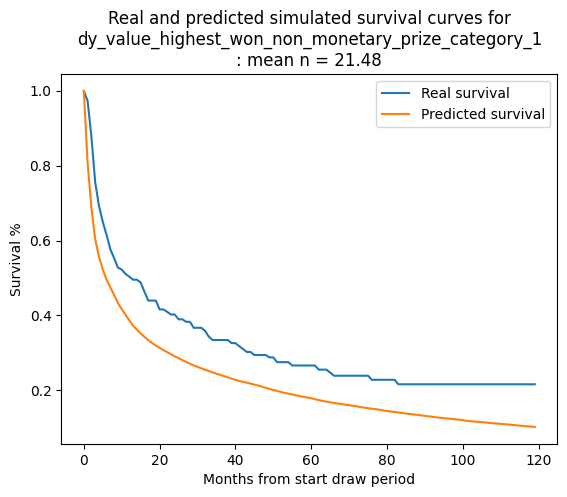

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_2


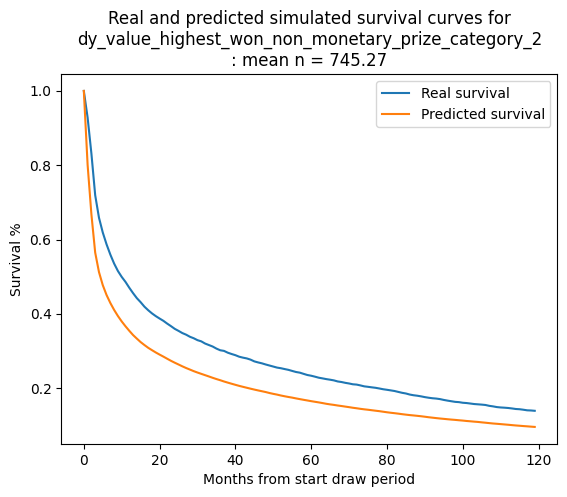

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_3


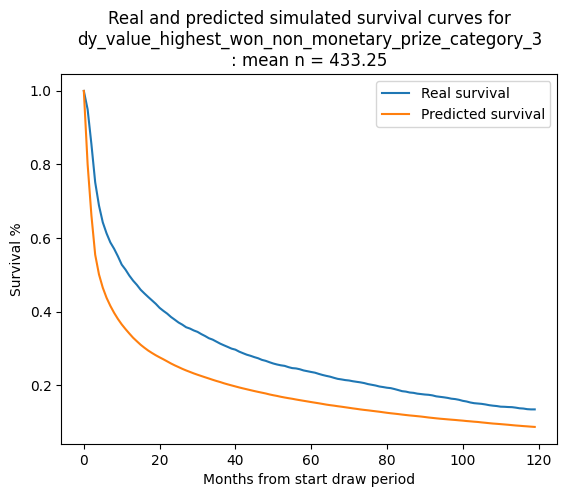

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_4


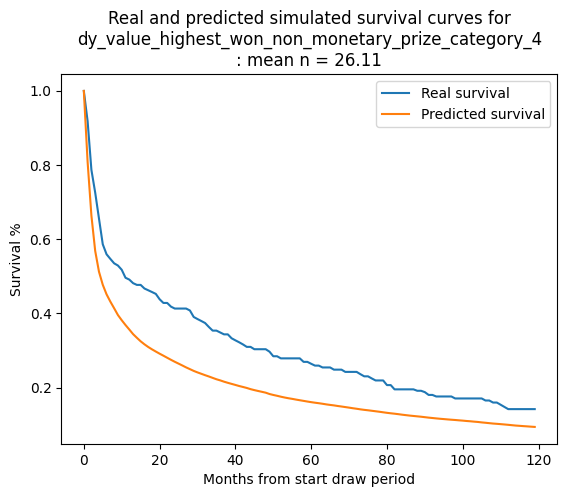

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_5


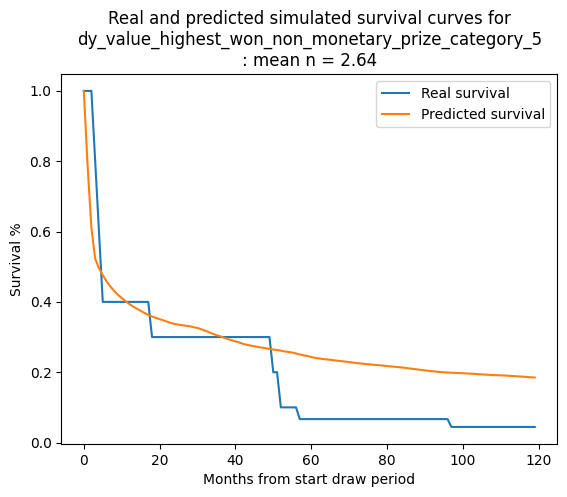

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_6


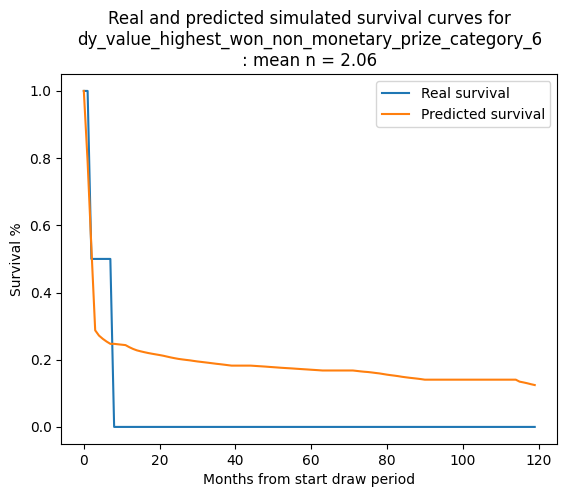

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_value_highest_won_non_monetary_prize_category_8


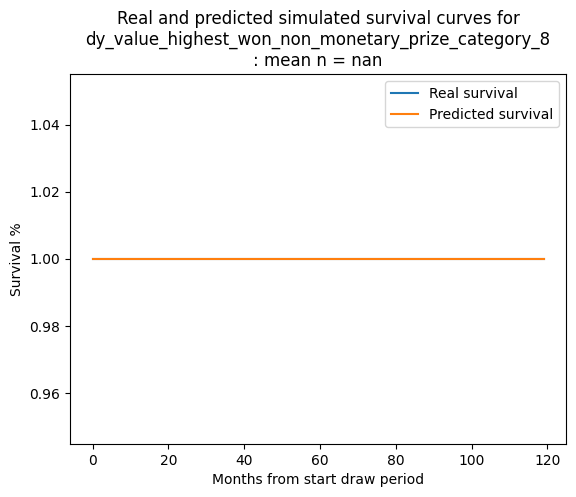

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_monetary_prize_won_l3m_1


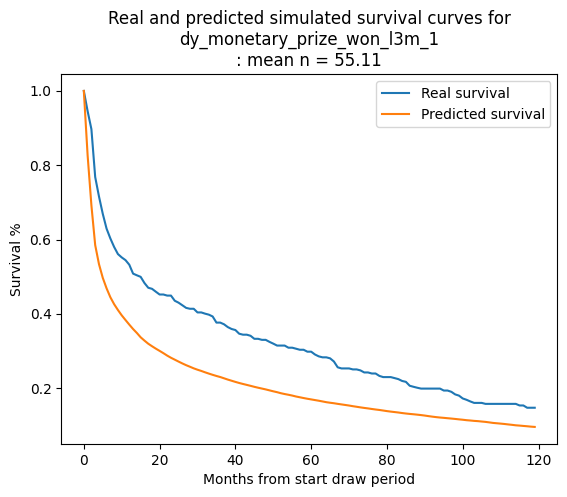

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_monetary_prize_won_l3m_2-4


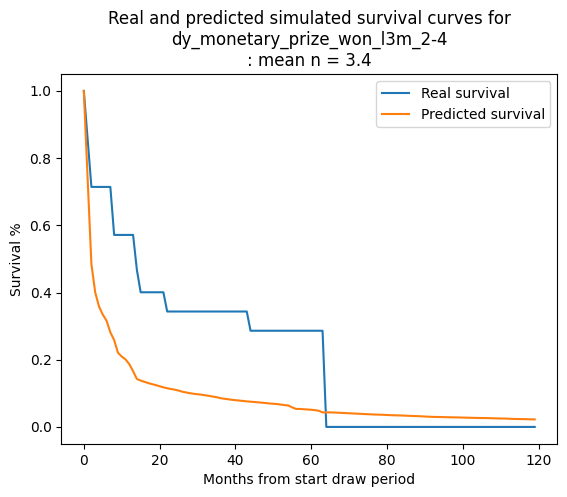

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_monetary_prize_won_l12m_to_l3m_1


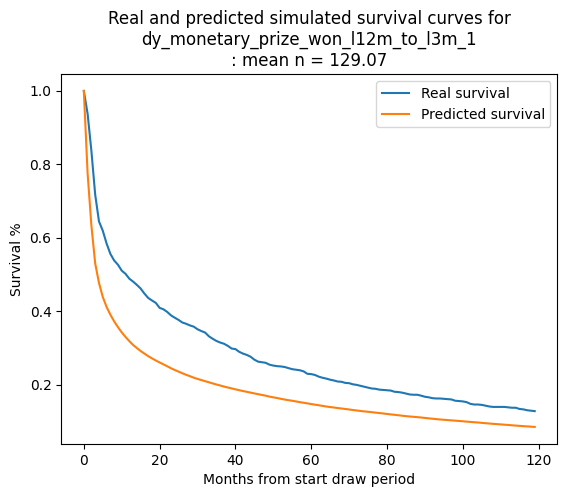

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_monetary_prize_won_l12m_to_l3m_2-4


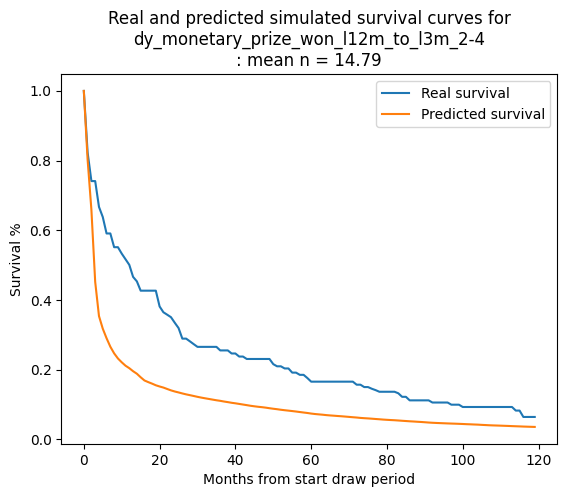

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_monetary_prize_won_l12m_to_l3m_5-9


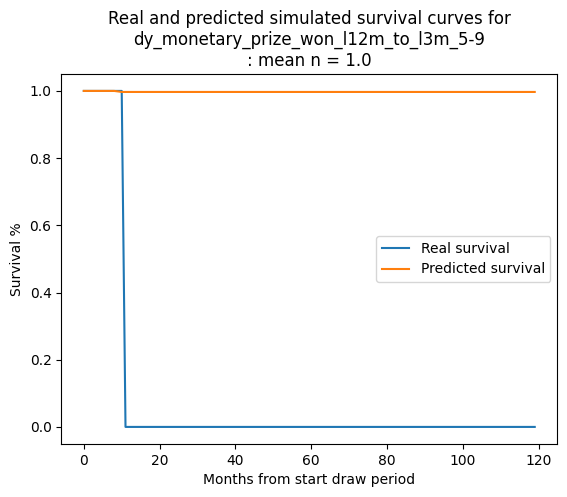

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l3m_1


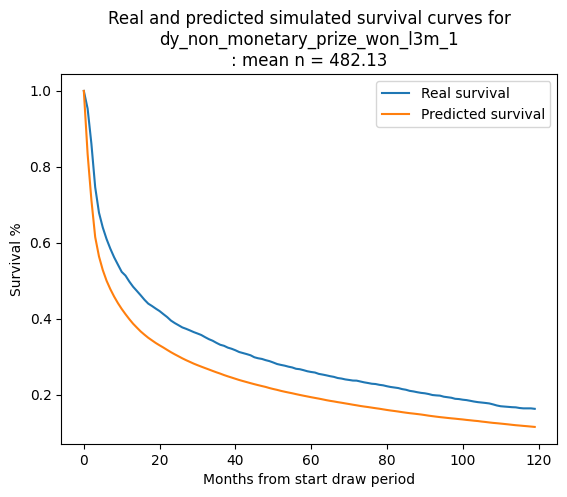

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l3m_10+


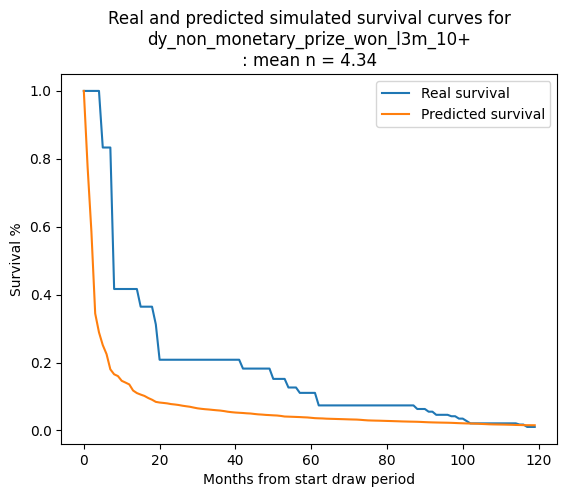

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l3m_2-4


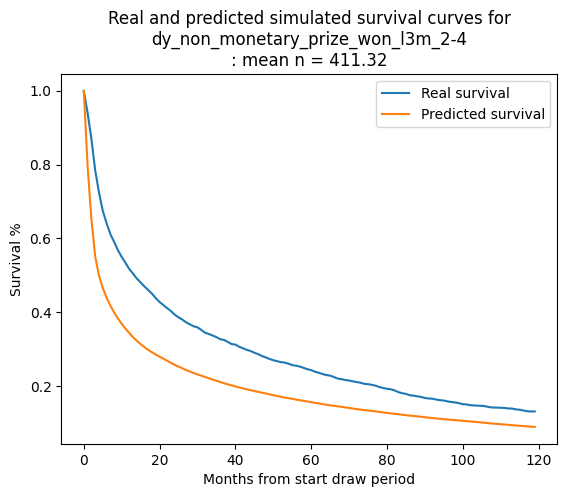

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l3m_5-9


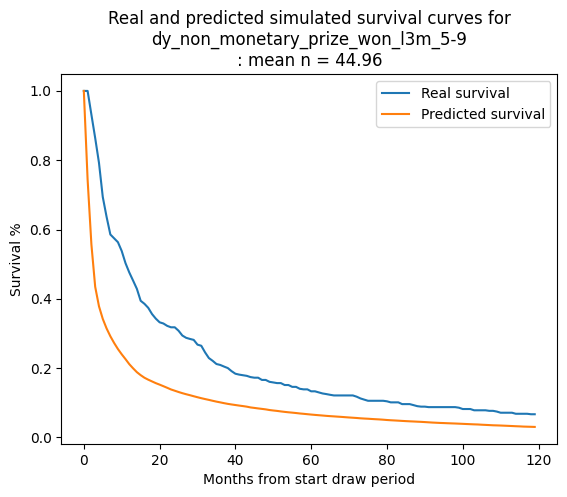

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l12m_to_l3m_1


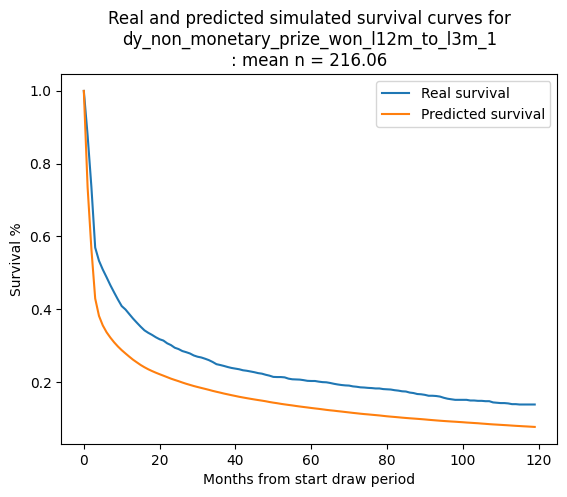

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l12m_to_l3m_10+


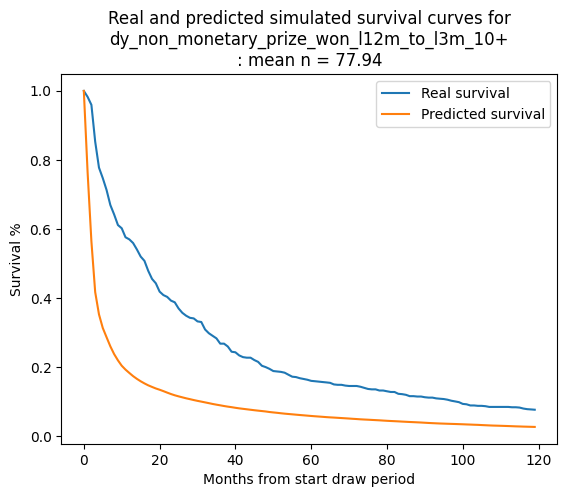

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l12m_to_l3m_2-4


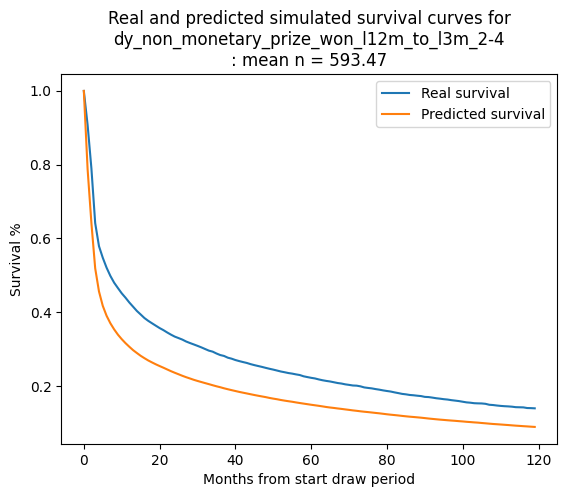

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_non_monetary_prize_won_l12m_to_l3m_5-9


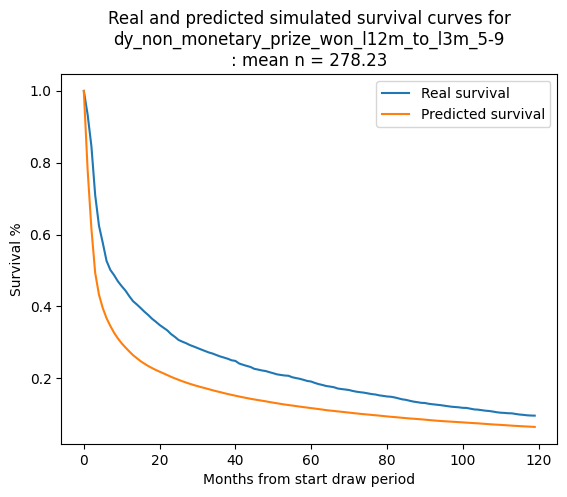

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_free_playing_round_l3m_1


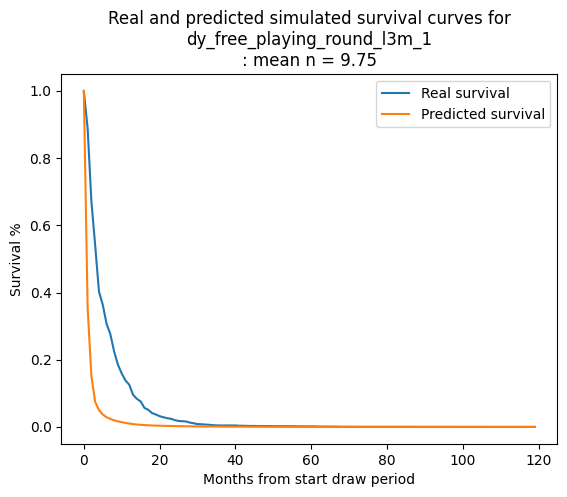

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_free_playing_round_l3m_2+


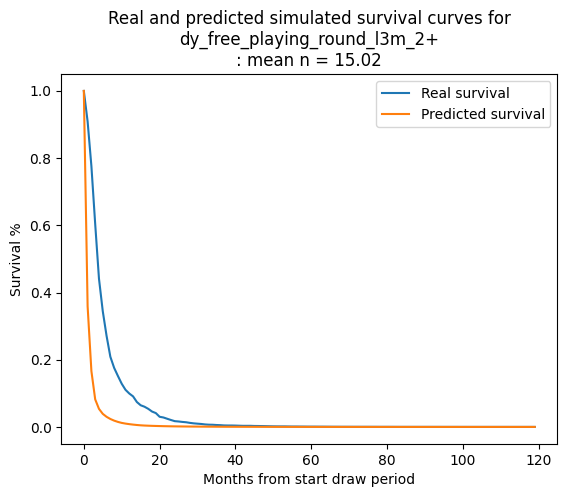

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_free_playing_round_l12m_to_l3m_1


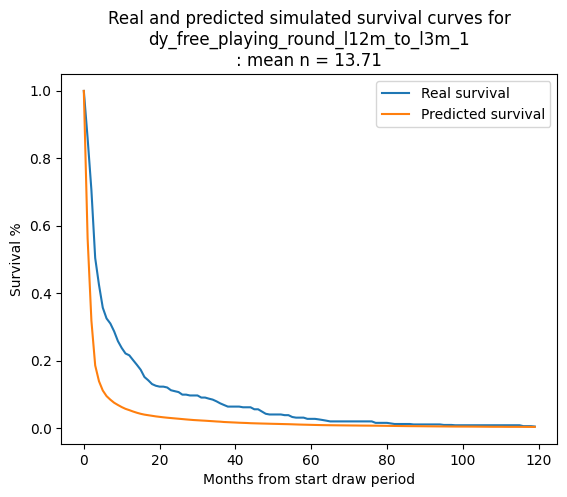

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_free_playing_round_l12m_to_l3m_2+


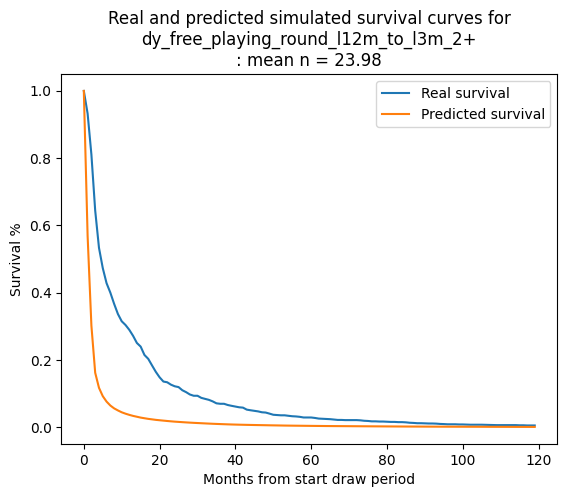

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l3m_1


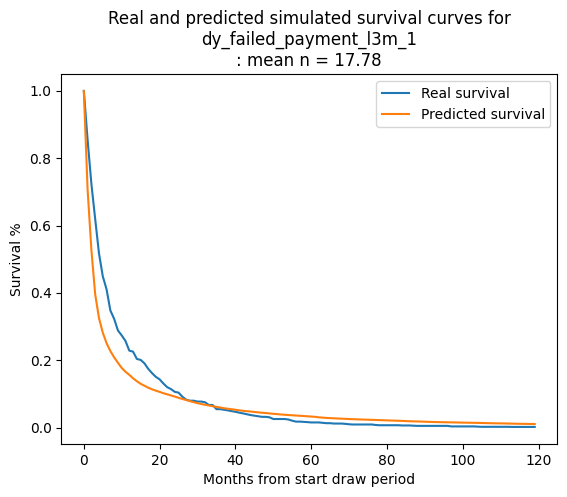

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l3m_2-4


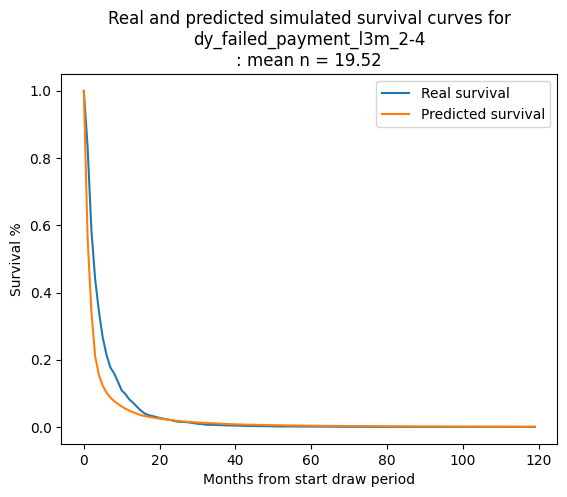

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l3m_5+


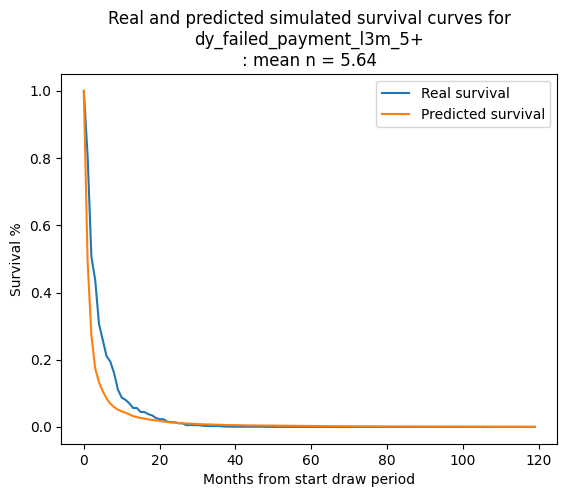

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l12m_to_l3m_1


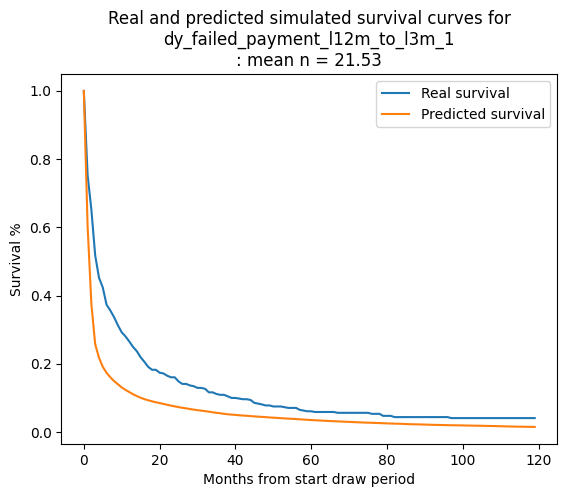

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l12m_to_l3m_2-4


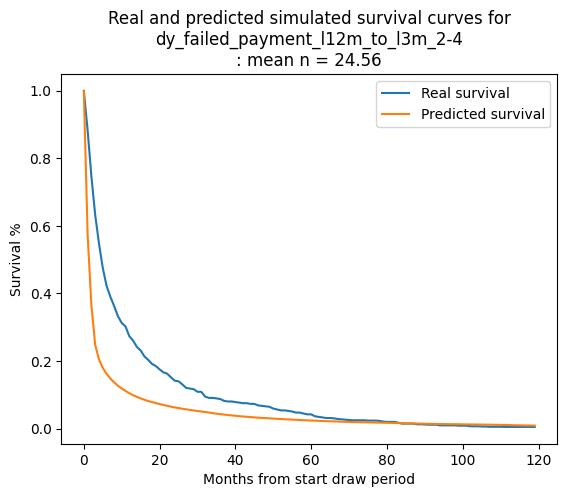

INFO:root:Calculating cumulative hazard rates


INFO:root:Calculating survival curves


Plotting simulated survival curve for dy_failed_payment_l12m_to_l3m_5+


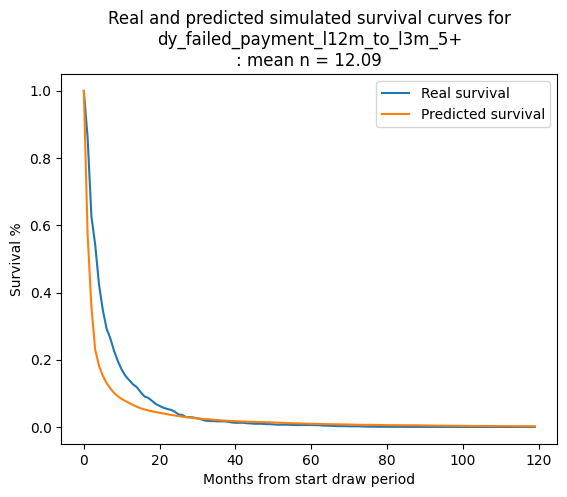

INFO:root:Closing connection to Snowflake using __exit__ method in the SnowflakeConnectionMaker class


INFO:root:Connection to Snowflake successfully closed.


In [8]:
with SnowflakeConnectionMaker() as connection_maker:
    connection = connection_maker.get_connection()

    lottery = os.environ.get("LOTTERY")
    connector = DatabaseConnector(connection)
    config = Configuration.load_sagemaker(lottery, job_type="processing")
    evaluator = BaseTLVEvaluator(
        lottery=lottery,
        config=config,
        connector=connector,
        tlv_model=model,
    )

    evaluator.run_evaluation_plots()